# AIM - Identification of all the applicants who will benefit or harm the company. 

# Import Libraries 

In [1]:
#Necessary Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Dataset 

### 1)application_data as df_app
### 2)previous_application as df_prev 

## 1. Loading dataset "application_data.csv"

In [3]:
df_app = pd.read_csv('application_data.csv')
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## 2. Data Inspection  

#### 2.1. Checking Number of rows and columns- shape() function  

In [4]:
df_app.shape

(307511, 122)

#### 2.2. Checking Datatype for columns- info() function  

In [5]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### 2.3. Summarizing the  numeric columns 

In [6]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

#### 2.4 Calculating Null Value Percentage(NVP) for columns  

In [7]:
round((df_app.isnull().sum()/len(df_app)*100).head(50),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

## 3. Data Cleaning  

#### 3.1 Listing columns having NVP>35% 

In [8]:
null_col= df_app.isnull().sum().sort_values(ascending = False)
null_col= null_col[null_col.values>(0.35*len(df_app))]
print('Number of columns having NVP > 35% :', len(null_col))

Number of columns having NVP > 35% : 49


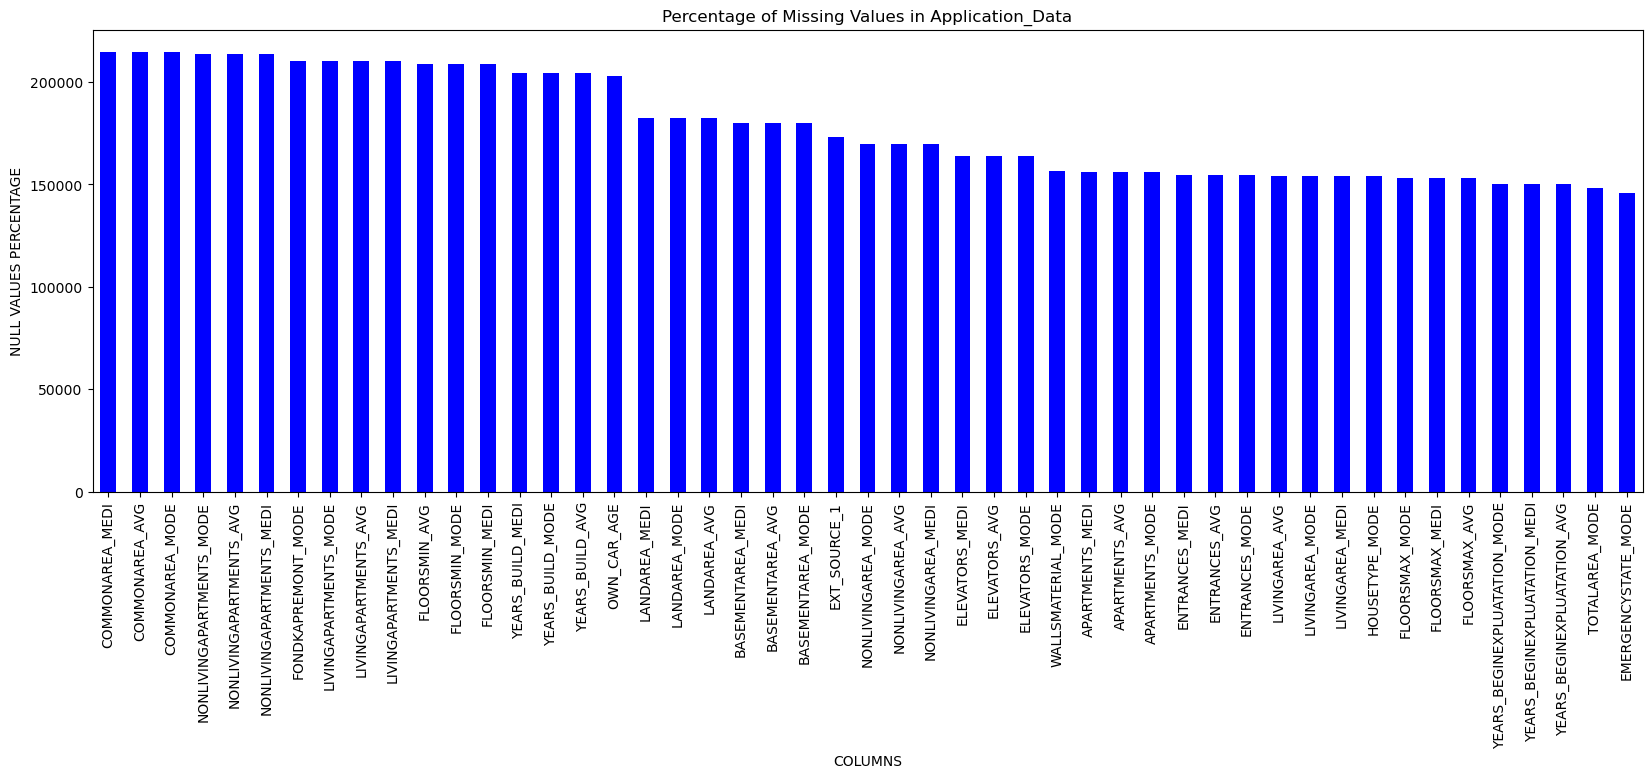

In [9]:
#Plotting a Graph 

plt.figure(figsize=(20,6))
null_col.plot(kind='bar', color='blue')
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

#### 3.2 Removing Columns having NVP > 35% 

In [10]:
label=list(null_col.index.values)
df_app.drop(labels=label, axis=1, inplace=True)

In [11]:
df_app.shape  #Shape Retained after removing columns having null value percentage>35%

(307511, 73)

#### 3.3 Reconfirming the NVP  

In [12]:
#confirming null value percentage
round((df_app.isnull().sum()/len(df_app)*100).head(50),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

## 4. Handling Missing Values  

#### 4.1 Imputing columns having NVP < 19% - using Mode() and Median() Operation  

In [13]:
df_app.AMT_GOODS_PRICE.fillna(df_app.AMT_GOODS_PRICE.mode()[0],inplace = True) #AMT_GOODS_PRICE

df_app.NAME_TYPE_SUITE.fillna(df_app.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df_app.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df_app.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df_app.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df_app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df_app.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df_app.EXT_SOURCE_2.fillna(df_app.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df_app.EXT_SOURCE_3.fillna(df_app.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3



#### 4.2 Rechecking NVPs  

In [14]:
round((df_app.isnull().sum()/len(df_app)*100).head(50),2)  

#occupation type will not be imputed as it will be used for analysis further.

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

## 5. Handling Errors  

#### 5.1 Converting Days Columns from Negative to Positive - abs() Function 

In [15]:
#Days column should be positive but we have negative values here that needs to be converted

df_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [16]:
#Collecting columns that have days starting with DAYS

day_cols = [i for i in df_app if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [17]:
#Converting Negative Values to positive
df_app[day_cols]=abs(df_app[day_cols])
print(df_app['DAYS_BIRTH'].unique())
print(df_app['DAYS_EMPLOYED'].unique())
print(df_app['DAYS_REGISTRATION'].unique())
print(df_app['DAYS_ID_PUBLISH'].unique())
print(df_app['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


#### 5.2 Converting Flag Columns from 'Y' or 'N' to 1 or 0

In [18]:
df_app['FLAG_OWN_CAR'] = np.where(df_app['FLAG_OWN_CAR']=='Y', 1 , 0)
df_app['FLAG_OWN_REALTY'] = np.where(df_app['FLAG_OWN_REALTY']=='Y', 1 , 0)

df_app[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

#### 5.3  Converting 'XNA' values to 'F' in Gender Columns 

In [19]:
df_app.loc[df_app.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df_app.CODE_GENDER.head()


0    M
1    F
2    M
3    F
4    M
Name: CODE_GENDER, dtype: object

## 6. Binning Data

#### 6.1 Binning Income Total to Income groups 

In [20]:
df_app['INCOME_GROUP'] = pd.qcut(df_app.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df_app['INCOME_GROUP'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: INCOME_GROUP, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

#### 6.2 Binning Credit Amount to Credit groups 

In [21]:
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [22]:
df_app['CREDIT_GROUP'] = df_app['AMT_CREDIT'].apply(credit_group)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...                 0                0                        0.0   
1  ...                 0                0                        0.0   
2  ...                 0                0                        0.0   
3  ...                 0                0                        NaN   
4  ...                 0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  INCOME_GROUP  CREDIT_GROUP  
0                         1.0        MEDIUM           Low  
1                         0.0          HIGH          High  
2                         0.0      VERY_LOW           Low  
3                         NaN           LOW           Low  
4                         0.0           LOW        Medium  

[5 rows x 75 columns]

####  6.3 Binning Birth Days to Age groups 

In [23]:
df_app['DAYS_BIRTH']= (df_app['DAYS_BIRTH']/365).astype(int)    # Converting 
print(df_app['DAYS_BIRTH'].unique())


[25 45 52 54 46 37 51 55 39 27 36 38 23 35 26 48 31 50 40 30 68 43 28 41
 32 33 47 57 65 44 64 21 59 49 56 62 53 42 29 67 63 61 58 60 34 22 24 66
 69 20]


In [24]:
df_app['AGE_GROUP']=pd.cut(df_app['DAYS_BIRTH'],bins=[20,35,60,100], labels=['Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

df_app[['DAYS_BIRTH','AGE_GROUP']].head()


DAYS_BIRTH   AGE_GROUP
0          25       Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

Removing Unwnnted Columns for better Data Analysis 

In [25]:
#Listing the Unwanted Columns 

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [26]:
#Removing the unwanted Columns 

df_app.drop(labels=unwanted,axis=1,inplace=True)

In [27]:
# Checking the retained columns 
df_app.shape 

(307511, 48)

# 7. Outliers Analysis  

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 

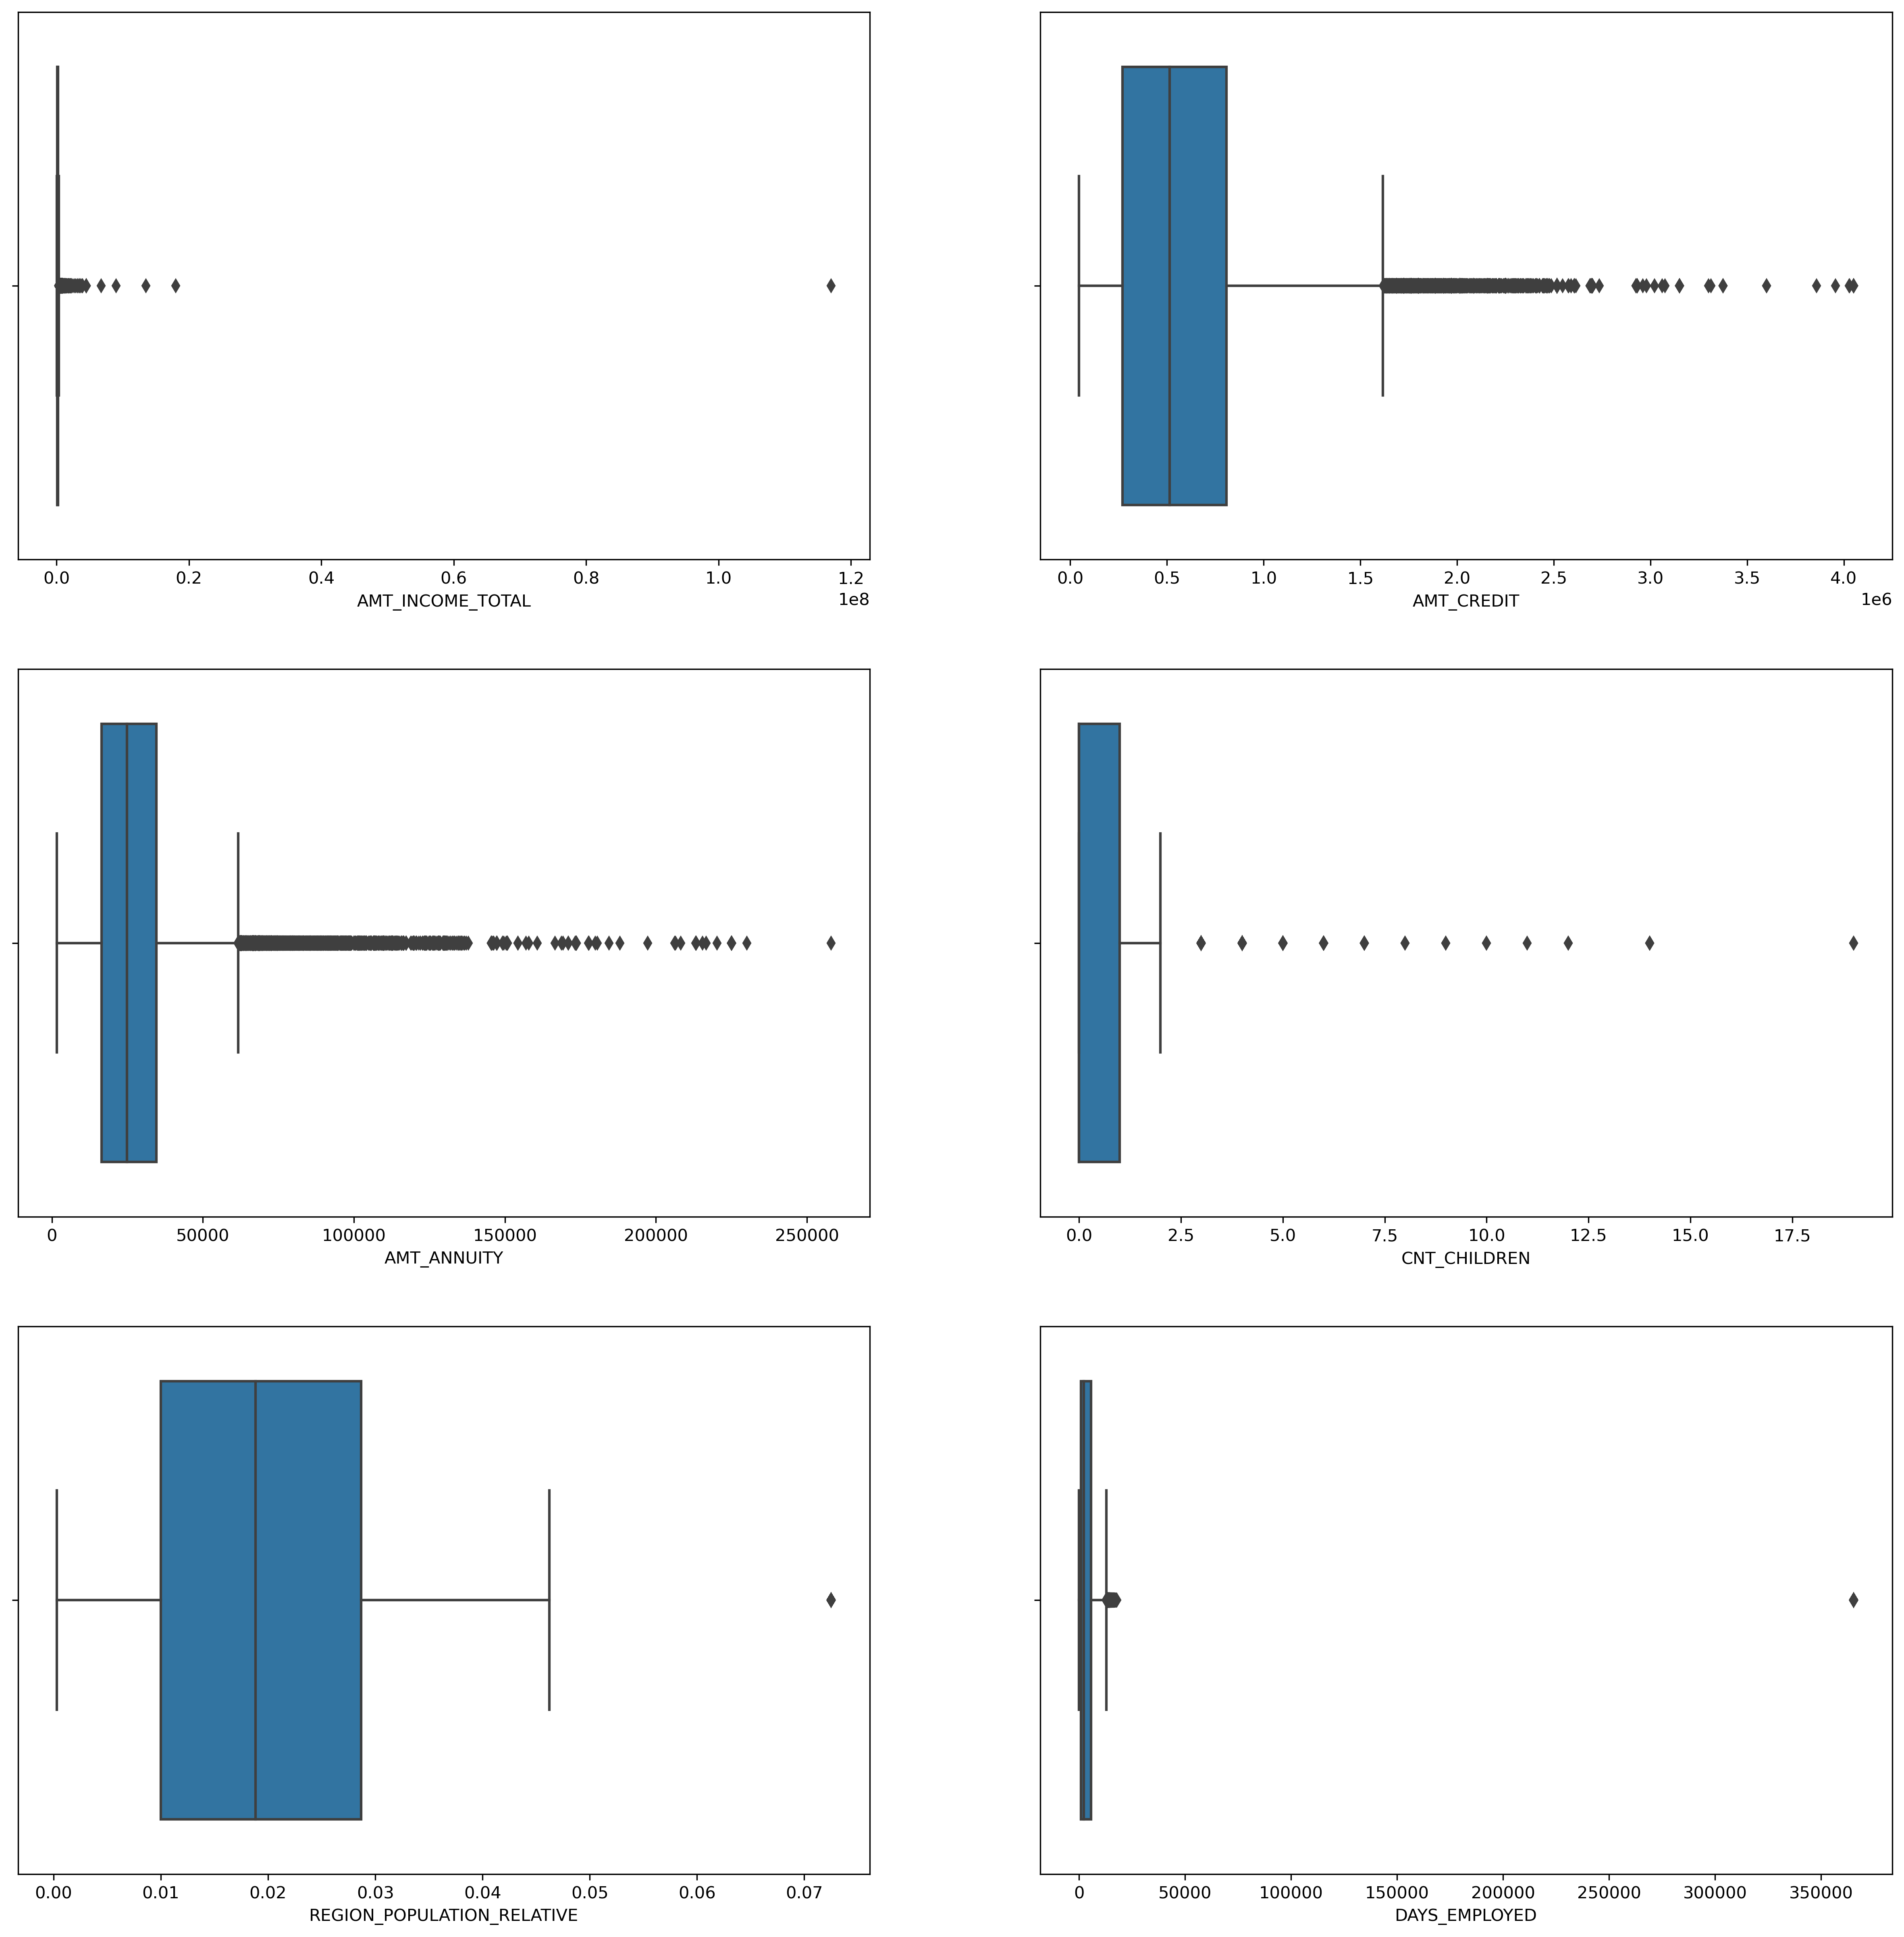

In [28]:
# Listing the columns for analysis 
features = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_CHILDREN','REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED']

# Box plots for the selected columns 

plt.figure(figsize = (20,20), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x =i[1], data = df_app)
plt.show()


Insight: 

1. IQR for AMT_INCOME_TOTAL is very slim and it have a large number of outliers.
2. Third quartile of AMT_CREDIT is larger as compared to First quartile which means that most of the Credit amount of the loan of customers are present in the third quartile.And there are large number of outliers present in AMT_CREDIT.
3. Third quartile of AMT_ANNUITY is slightly larger than First quartile and there are large number of outliers.
4. CNT_CHILDREN have outlier values having children more than 5.
5. IQR for DAYS EMPLOYED is very slim.Most of the outliers are present below 25000.And a outlier is present 375000.

# 8. Data Imbalance Analysis 

A dataset having unequal class distribution is said to be imbalanced.

#### 8.1. Plotting data imbalance for suspected columns 

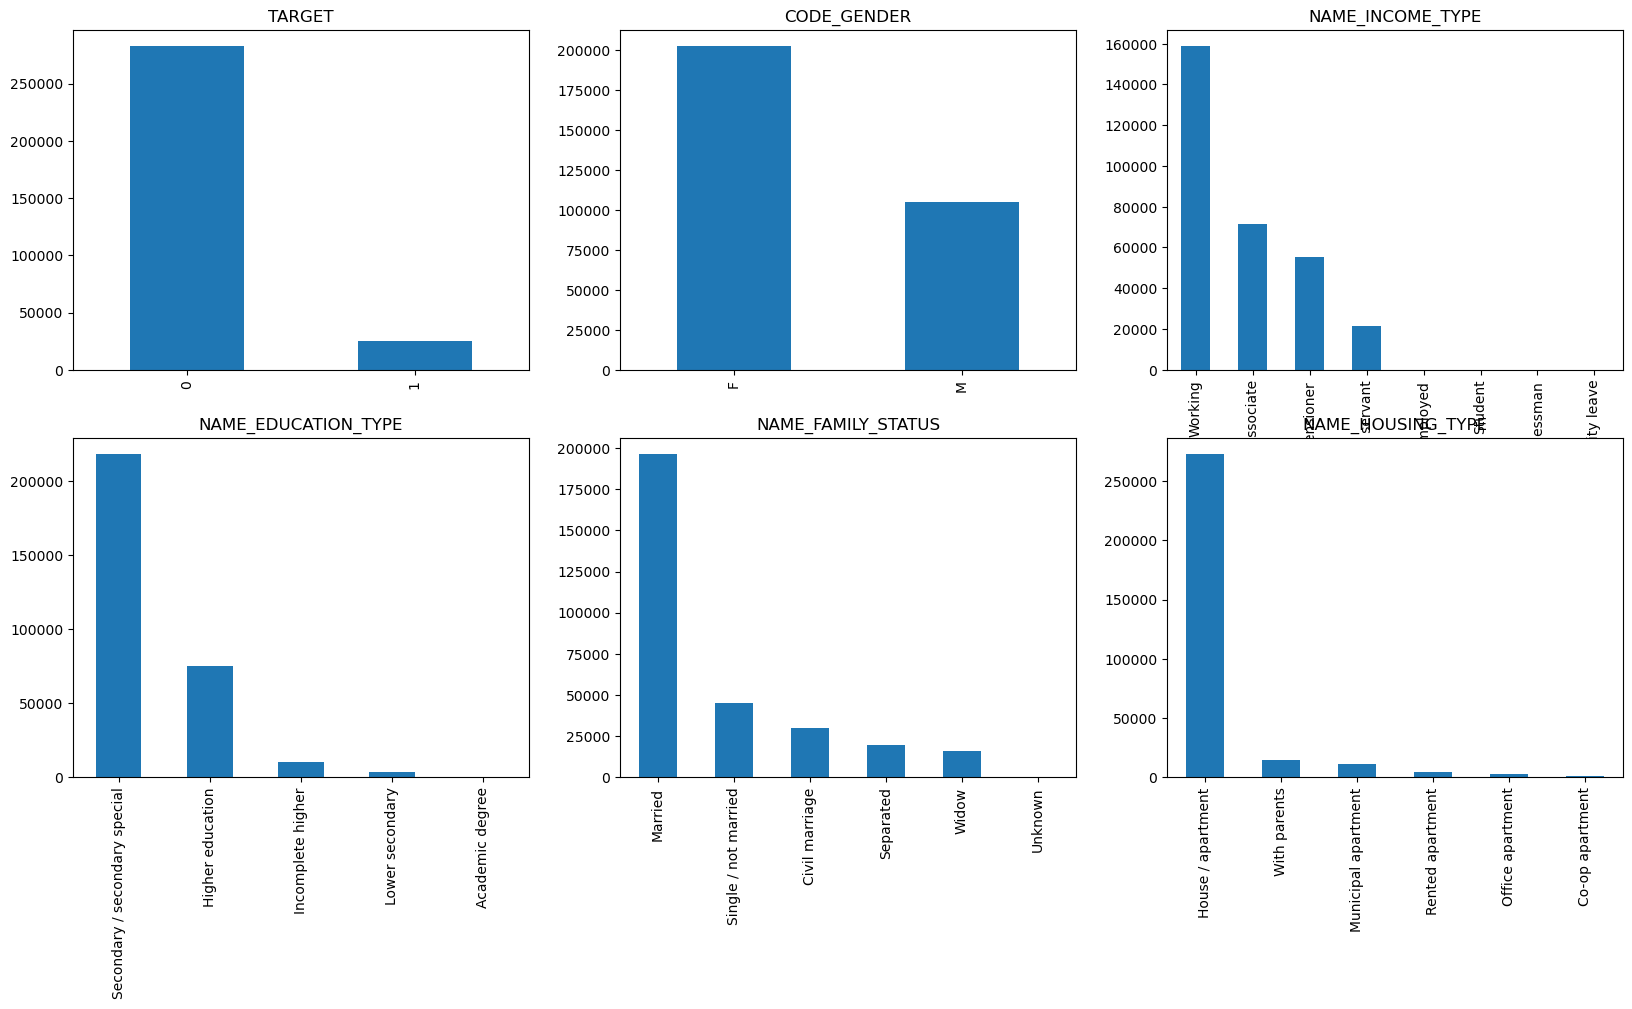

In [29]:
# Listing out columns to check data imbalance in them 

col_list = ['TARGET', 'CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

# Plotting Data Imbalancefor different columns

k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_app[col].value_counts().plot(kind='bar');
    plt.title(col)


#### 8.2. Splitting data into two different dataframes based on Target  

In [30]:
#We can clearly see the Imbalance in Target Value 

Target0 = df_app.loc[df_app["TARGET"]==0] #Repayers
Target1 = df_app.loc[df_app["TARGET"]==1] #Defaulters

#### 8.3. Calculating Ratio  

In [31]:
print('Data Imbalance Ratio:',round(len(Target0)/len(Target1),2))

Data Imbalance Ratio: 11.39


# 9. Univariate Analysis 

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.

## Analysis For Categorical Data  

#### 9.1. Based on Gender  

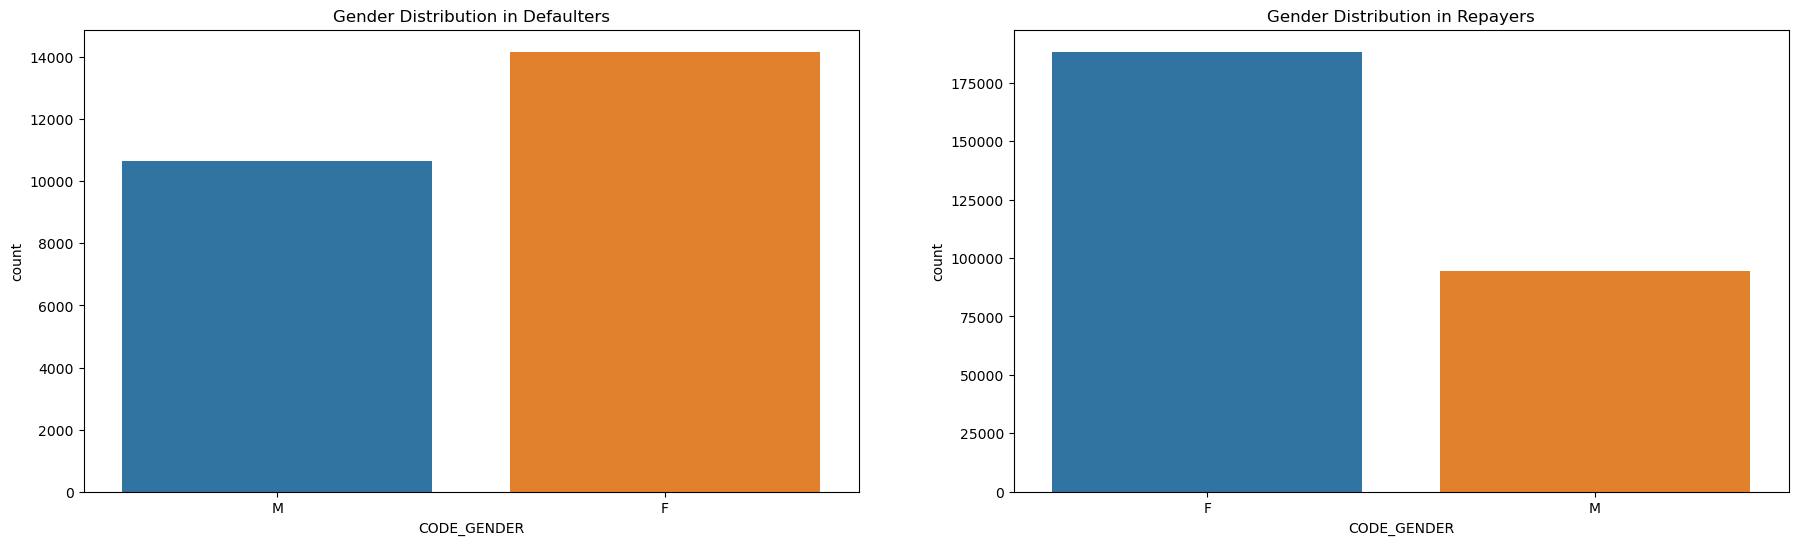

In [32]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER',data=Target1)
plt.title("Gender Distribution in Defaulters")

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',data=Target0)
plt.title("Gender Distribution in Repayers")

plt.show()


Insight : 
1. Defaluters - We can see that females are slightly more in number of defaulters than male.
2. Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

#### 9.2. Based on Age  

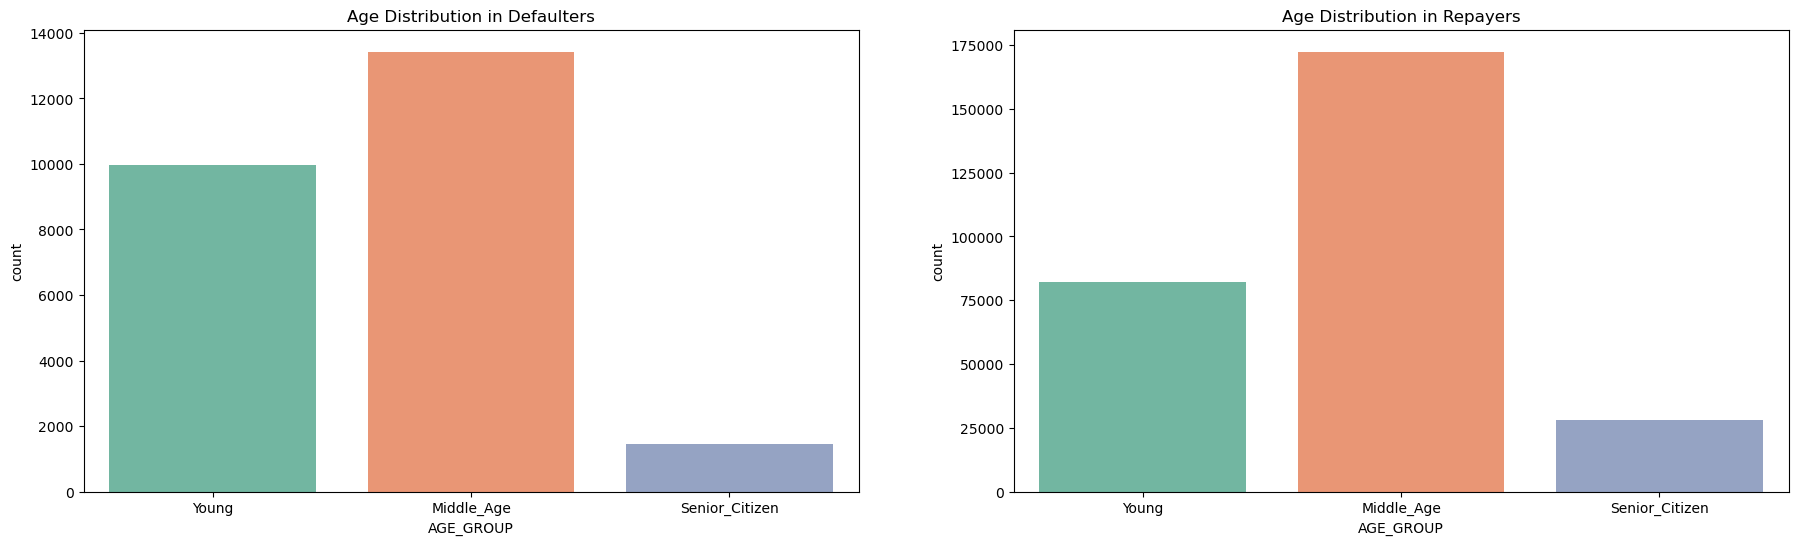

In [33]:
plt.figure(figsize=(22,6)) 

plt.subplot(1,2,1)
sns.countplot(x='AGE_GROUP',data=Target1,palette='Set2')
plt.title("Age Distribution in Defaulters")

plt.subplot(1,2,2)
sns.countplot(x='AGE_GROUP',data=Target0,palette='Set2')
plt.title("Age Distribution in Repayers")

plt.show()

Insight :
1. Defaluters - We can see that Middle_Age group are most in number of defaulters while Senior_citizens are least.
2. Repayers - The same pattern continues for non-defaluters as well. 

#### 9.3. Based on Loan Type 

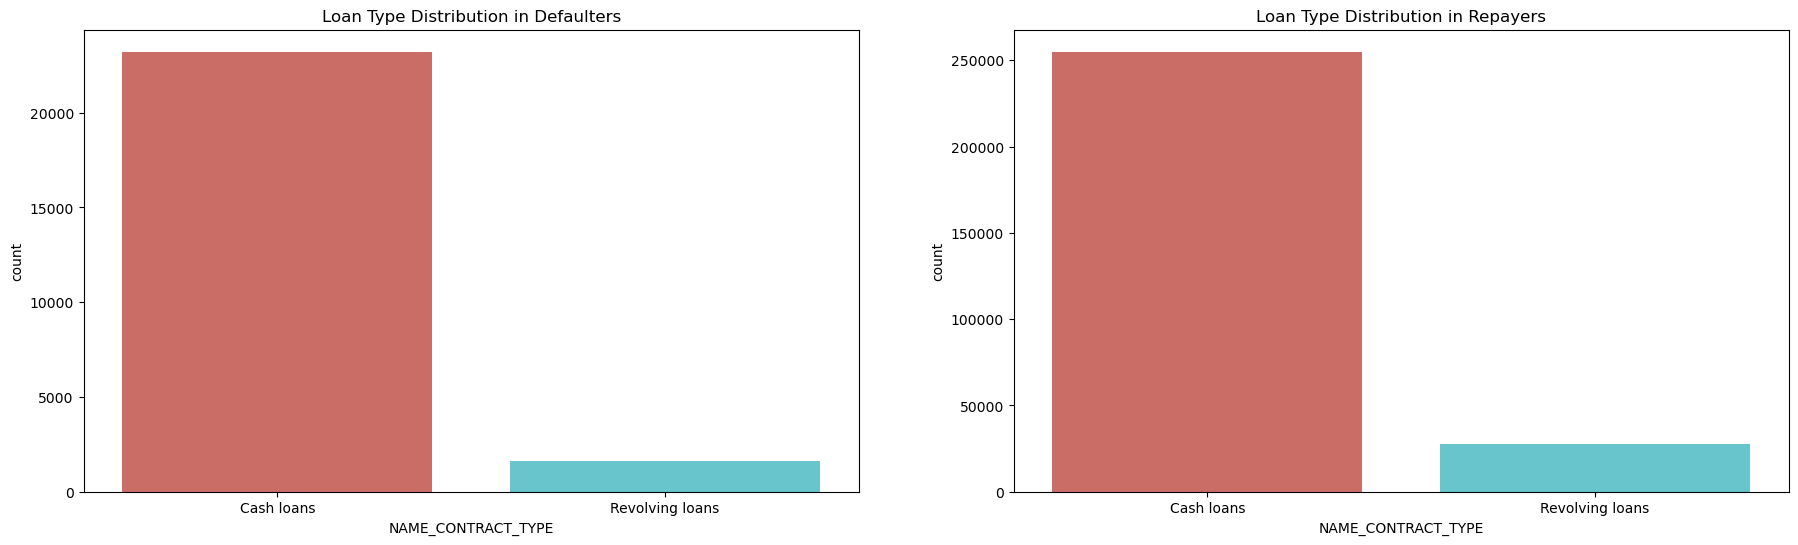

In [34]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)    
sns.countplot(x = 'NAME_CONTRACT_TYPE',data=Target1, palette='hls')
plt.title("Loan Type Distribution in Defaulters")

plt.subplot(1,2,2) 
sns.countplot(x = 'NAME_CONTRACT_TYPE',data=Target0, palette='hls')
plt.title("Loan Type Distribution in Repayers")

plt.show()


Insights :

1. We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#### 9.4. Based on Income Type  

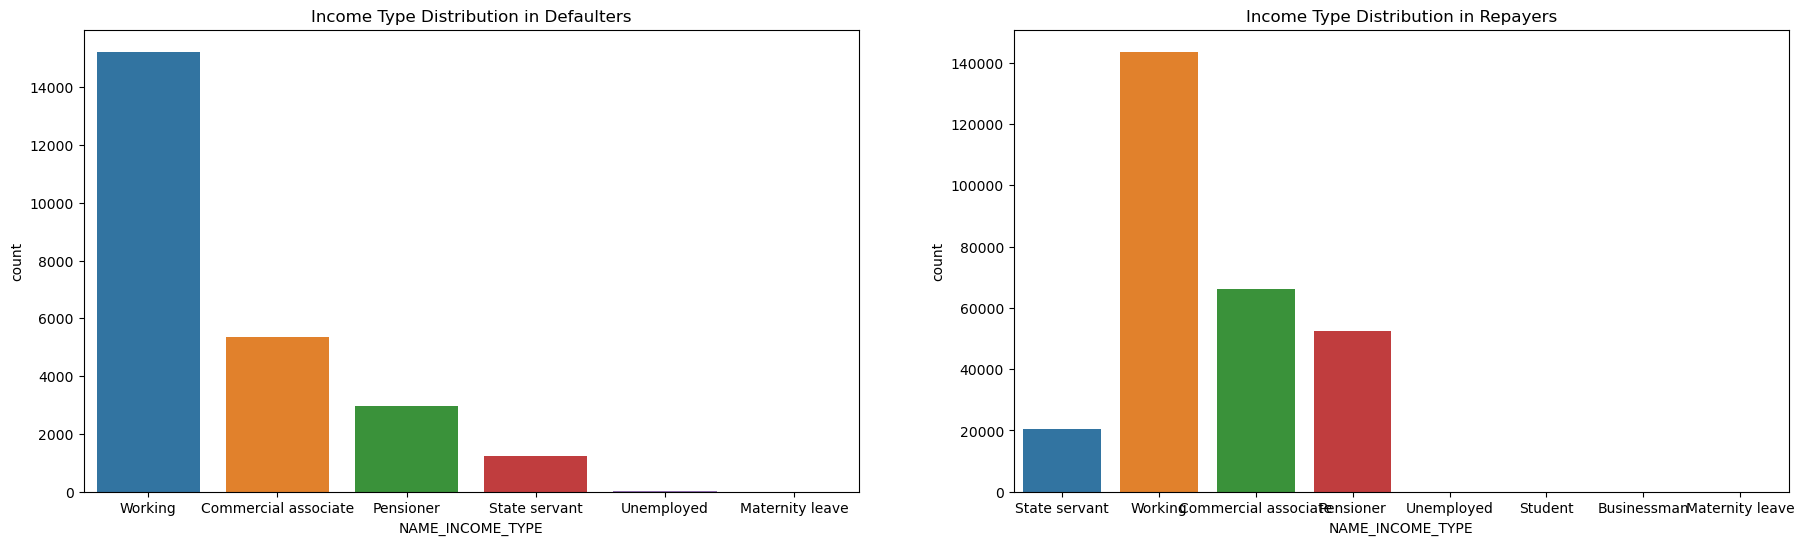

In [35]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)    
sns.countplot(x = 'NAME_INCOME_TYPE',data=Target1)
plt.title("Income Type Distribution in Defaulters")

plt.subplot(1,2,2) 
sns.countplot(x = 'NAME_INCOME_TYPE',data=Target0)
plt.title("Income Type Distribution in Repayers")

plt.show()


Insights : 
1. Defaulters - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
2. Repayers - Similarly here also working people are more in number who are not defaulted.

#### 9.5. Based on Education Type  

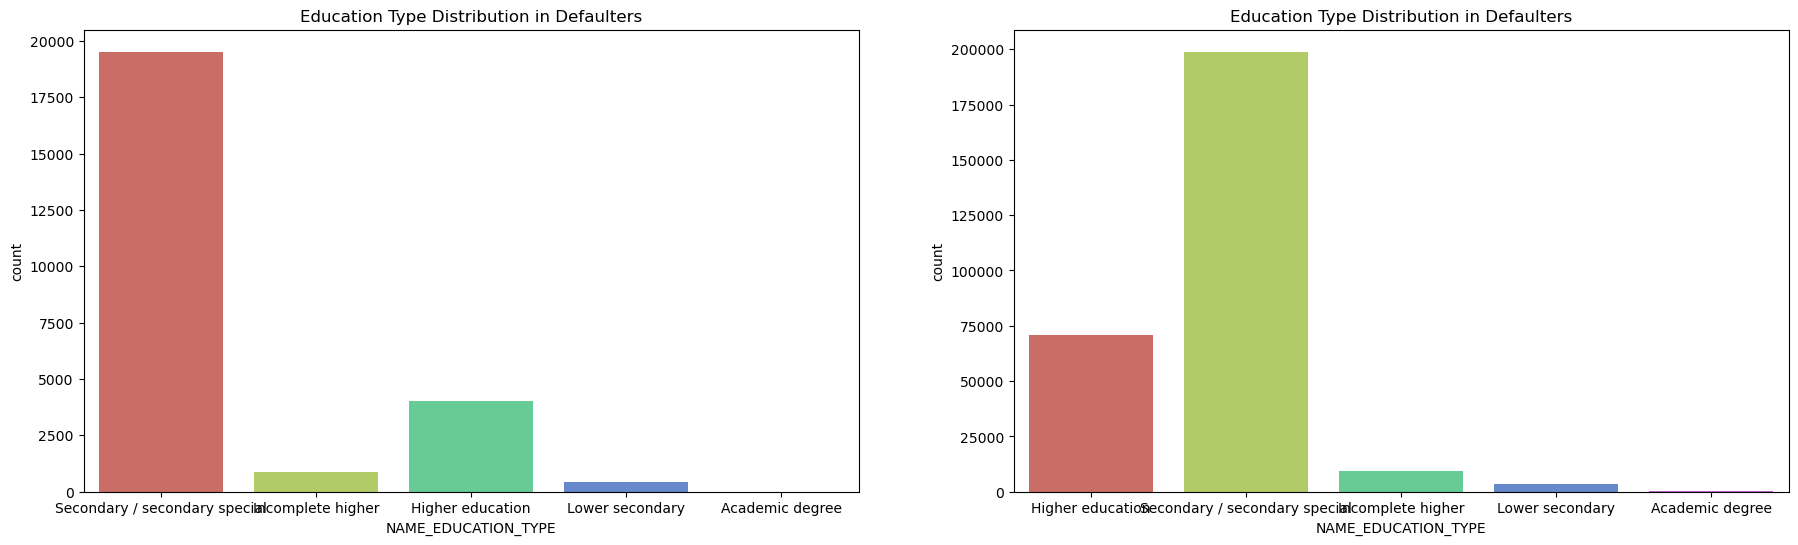

In [36]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)    
sns.countplot(x = 'NAME_EDUCATION_TYPE',data=Target1, palette='hls')
plt.title("Education Type Distribution in Defaulters")

plt.subplot(1,2,2) 
sns.countplot(x = 'NAME_EDUCATION_TYPE',data=Target0, palette='hls')
plt.title("Education Type Distribution in Defaulters")

plt.show()


Insights :
1. Defaulters - Education with Secondary/Secondary special customers are more number in defaulters comapre with other level of educated poeple.
2. Repayers - Same pattern follows.

#### 9.6. Based on Family Status  

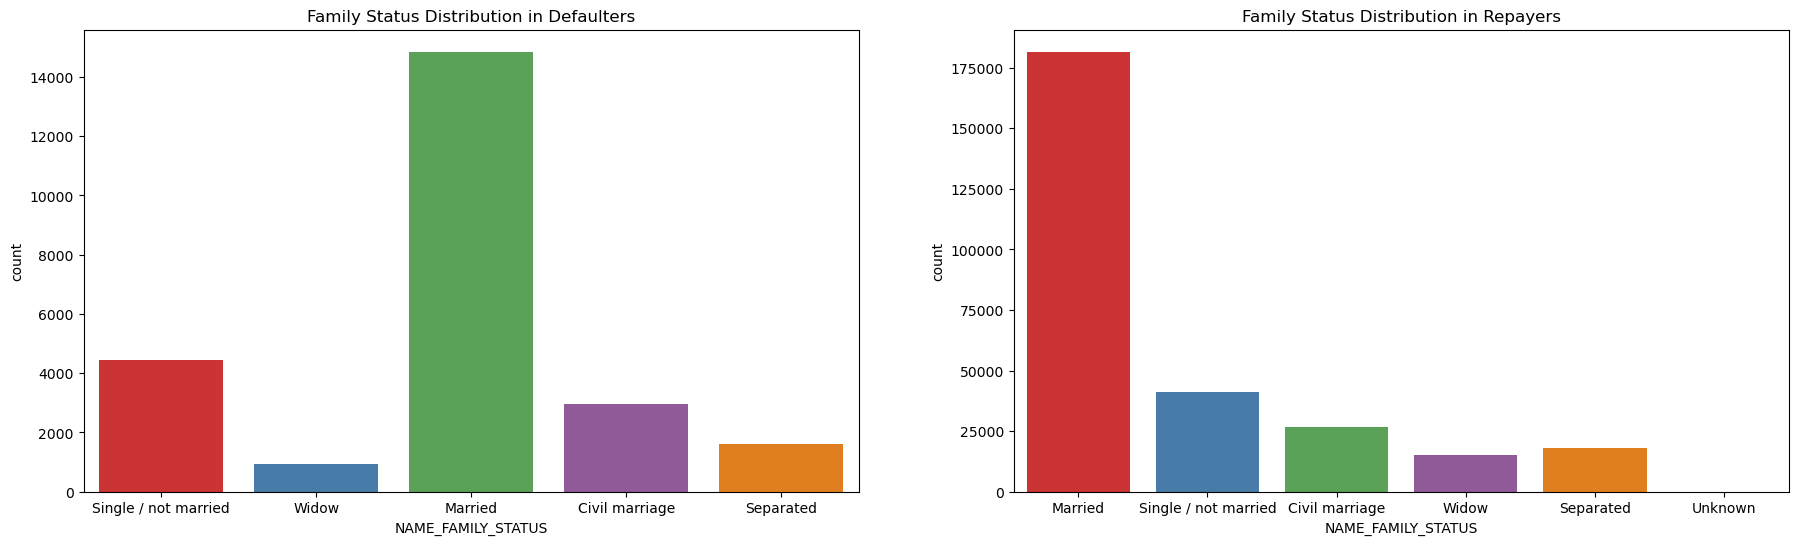

In [37]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)    
sns.countplot(x = 'NAME_FAMILY_STATUS',data=Target1, palette='Set1')
plt.title("Family Status Distribution in Defaulters")

plt.subplot(1,2,2) 
sns.countplot(x = 'NAME_FAMILY_STATUS',data=Target0, palette='Set1')
plt.title("Family Status Distribution in Repayers")

plt.show()

Insights : 
1. Defaulter- Married people are mostly defaulters.
2. Repayers- Same pattern follows.

## Analysis for Continuous Variables  

#### 9.7. Based on Credit Amount  

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

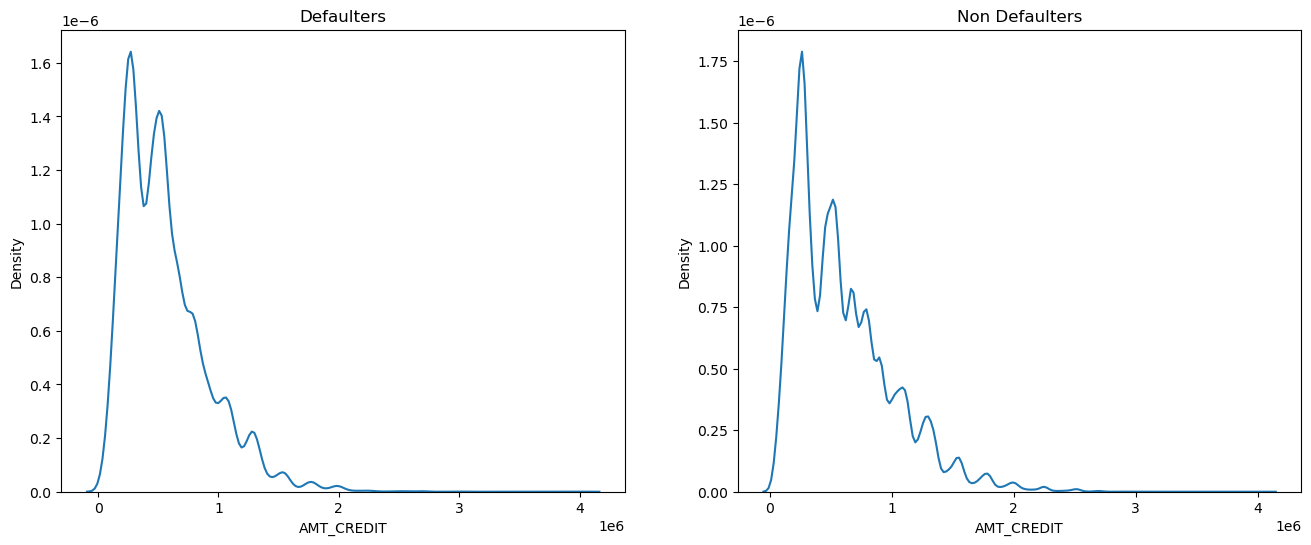

In [38]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(Target1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(Target0['AMT_CREDIT'],hist=False)


Insights :
    
1. Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
2. Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

#### 9.8. Based on Annuity Amount  

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

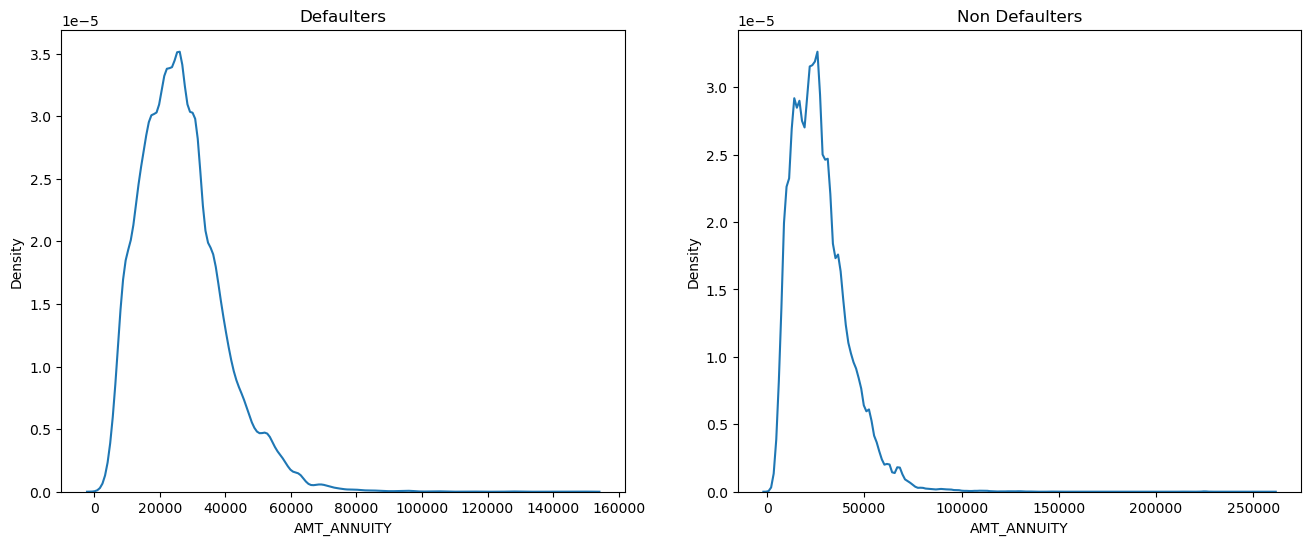

In [39]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(Target1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(Target0['AMT_ANNUITY'],hist=False)


Insight : 
1. In both the cases the loan annuity is concentrated more from 10000 to 40000.

#### 9.9. Based on Goods Price Amount  

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_GOODS_PRICE', ylabel='Density'>

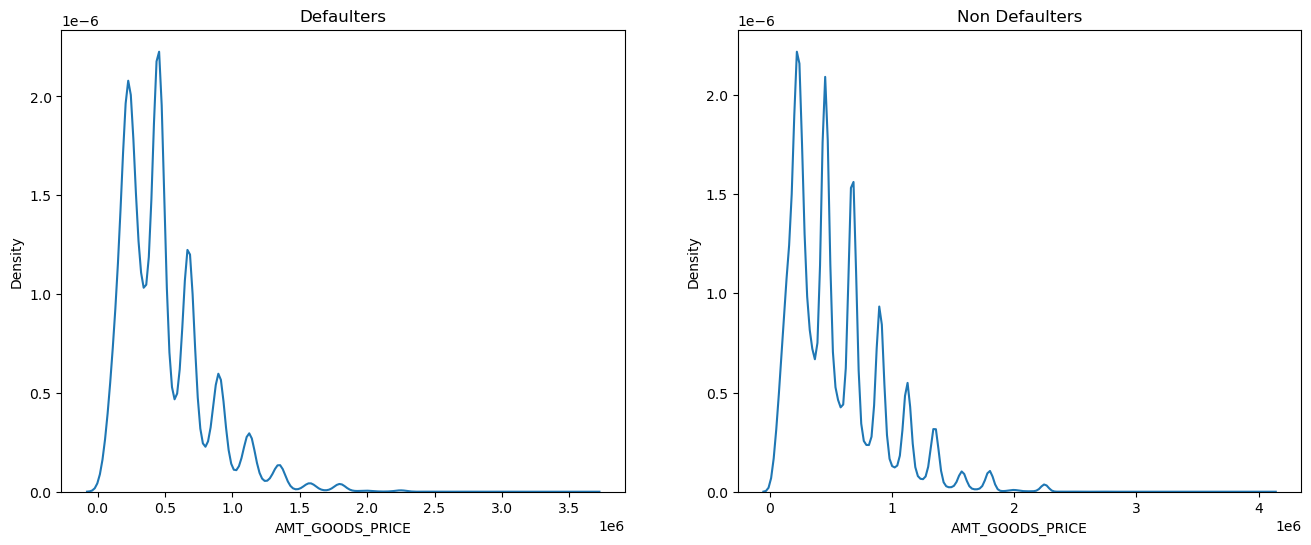

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(Target1['AMT_GOODS_PRICE'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(Target0['AMT_GOODS_PRICE'],hist=False)


Insights :
1. Both Defaulters and Non Defaulters shows same pattern.    

#### 9.10.  Based on Total Income  

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

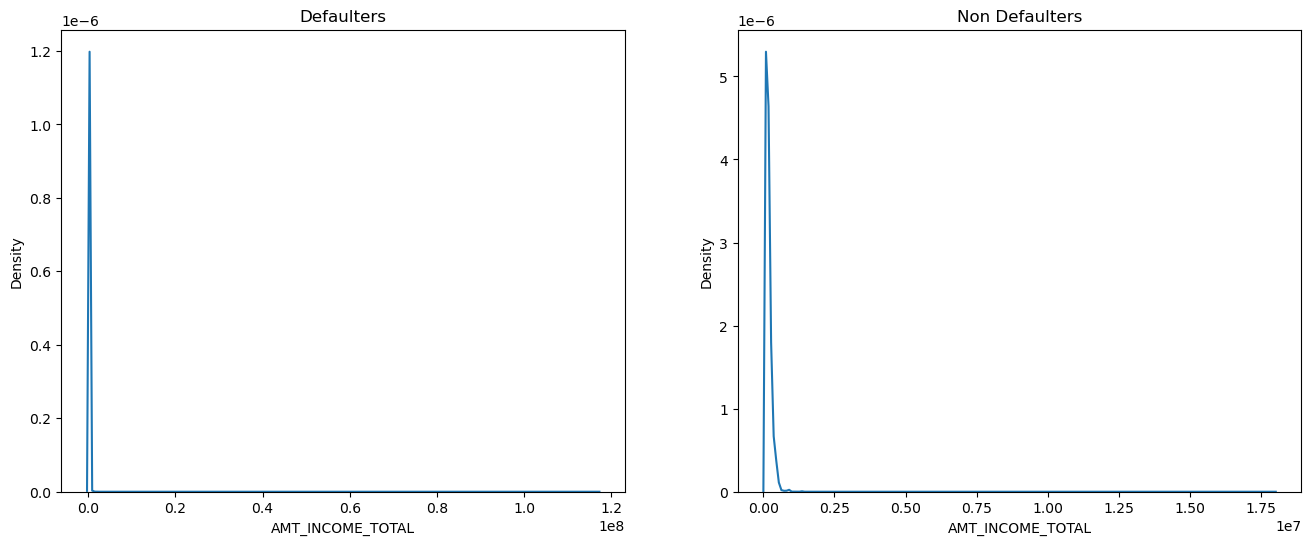

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(Target1['AMT_INCOME_TOTAL'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(Target0['AMT_INCOME_TOTAL'],hist=False)


Insights :
1. Defaulters -The pattern that for being a defaulter are almost equal in all income levels.
2. Non defaulters - Same Pattern is observed 

# 10. Bivariate Analysis 

Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.

## Analysis of Numerical data 

In [50]:
#Listing out the Numeric Columns 
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

In [51]:
# Creating dataframe for numerical columns for defaulters 
df_corr_target_1 = Target1[corr_cols]

In [52]:
# Corelation matrix
df_corr_target_1.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
AMT_INCOME_TOTAL          1.000000    0.038131     0.046421         0.037591
AMT_CREDIT                0.038131    1.000000     0.752195         0.982783
AMT_ANNUITY               0.046421    0.752195     1.000000         0.752295
AMT_GOODS_PRICE           0.037591    0.982783     0.752295         1.000000

<Axes: >

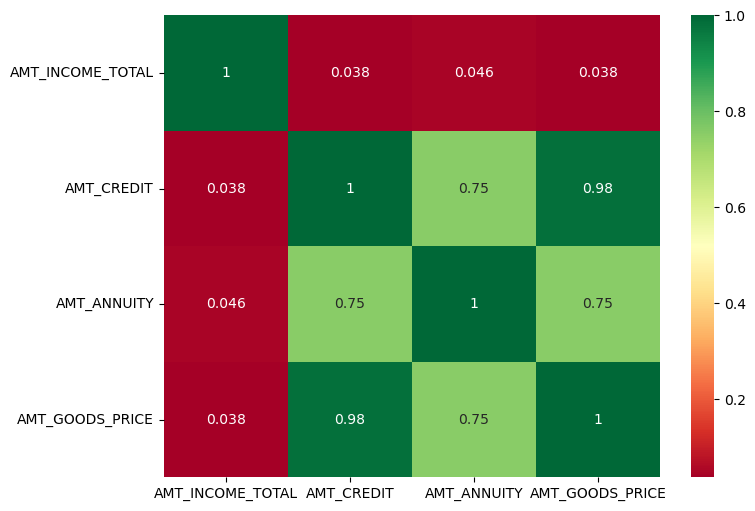

In [53]:
#Plotting correlation for Defaulters 
plt.figure(figsize=(8,6))
sns.heatmap(df_corr_target_1.corr(),cmap="RdYlGn",annot=True)

Insights :
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

In [54]:
# Creating dataframe for numerical columns for Repayers 
df_corr_target_0 = Target0[corr_cols]

In [55]:
# Corelation matrix
df_corr_target_0.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
AMT_INCOME_TOTAL          1.000000    0.342799     0.418953         0.349426
AMT_CREDIT                0.342799    1.000000     0.771309         0.987022
AMT_ANNUITY               0.418953    0.771309     1.000000         0.776433
AMT_GOODS_PRICE           0.349426    0.987022     0.776433         1.000000

<Axes: >

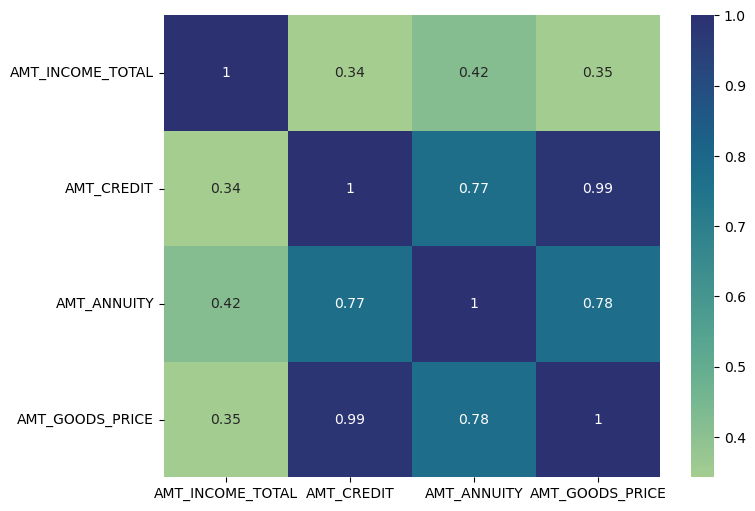

In [56]:
#Plotting correlation for Repayers 
plt.figure(figsize=(8,6))
sns.heatmap(df_corr_target_0.corr(),cmap="crest",annot=True)

Insights :
1. AMT_CREDIT and AMT_ANNUITY (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

## Analysis of Continuous Variable 

Text(0.5, 1.0, 'Non Defaulters')

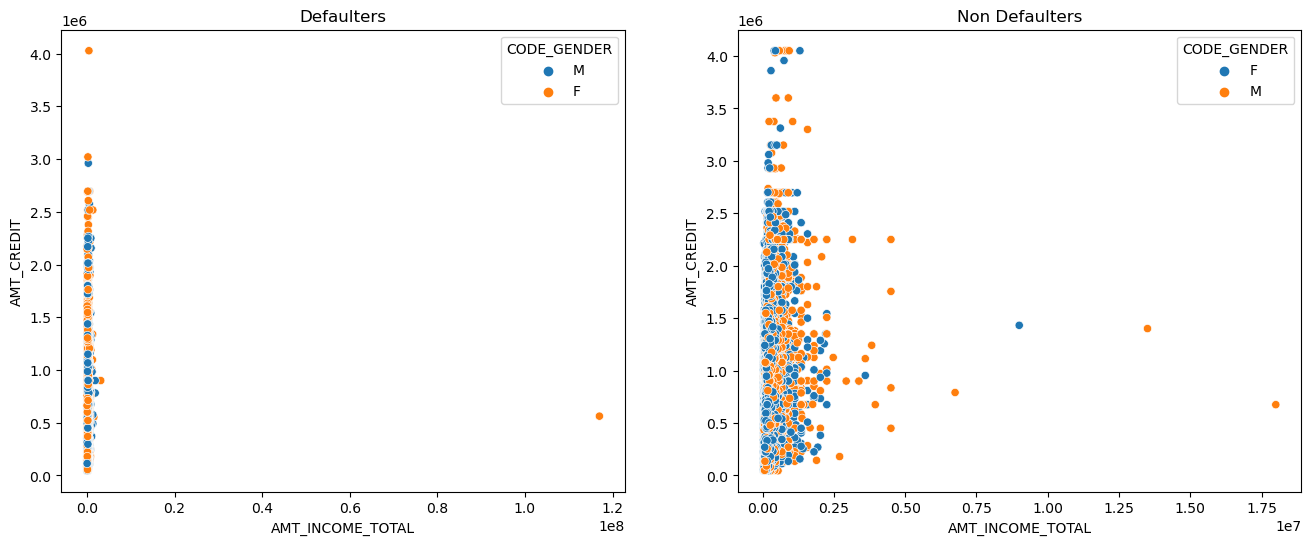

In [57]:
#Plotting Scatter Plot 

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='CODE_GENDER', data= Target1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT',hue = 'CODE_GENDER', data= Target0)
plt.title('Non Defaulters')

Insight : 
 1. Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. Non defaulters - We can hardly figure out any pattern out of this.   

Text(0.5, 1.0, 'Non Defaulters')

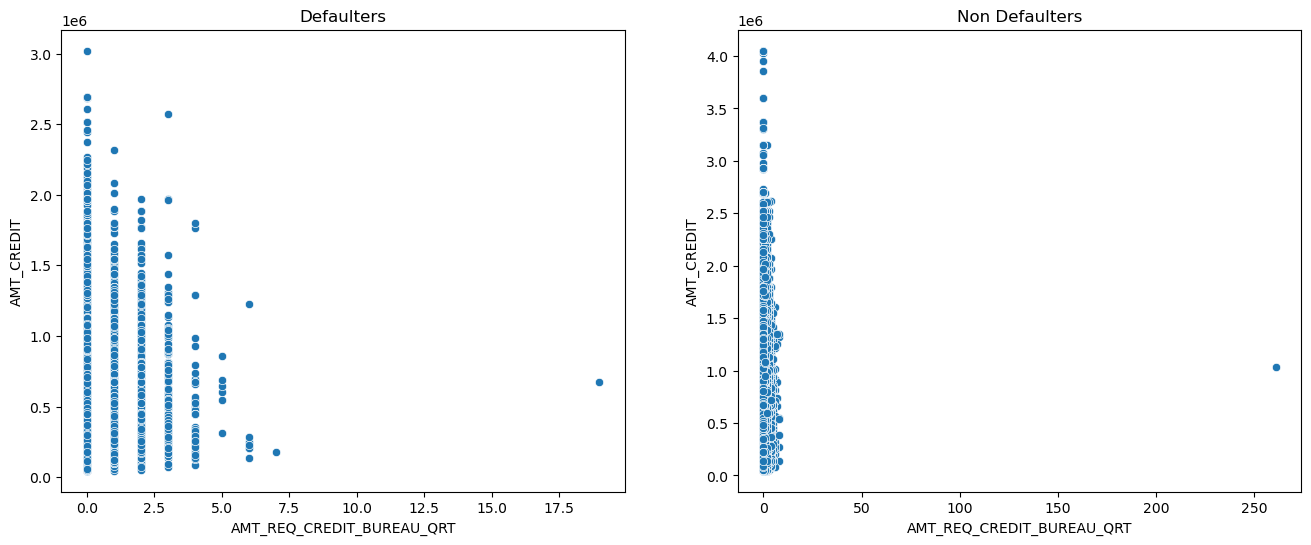

In [58]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT', data=Target1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT', data=Target0)
plt.title('Non Defaulters')


Insights: 
The more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

## Analysis of Categorical Data  

In [59]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP']

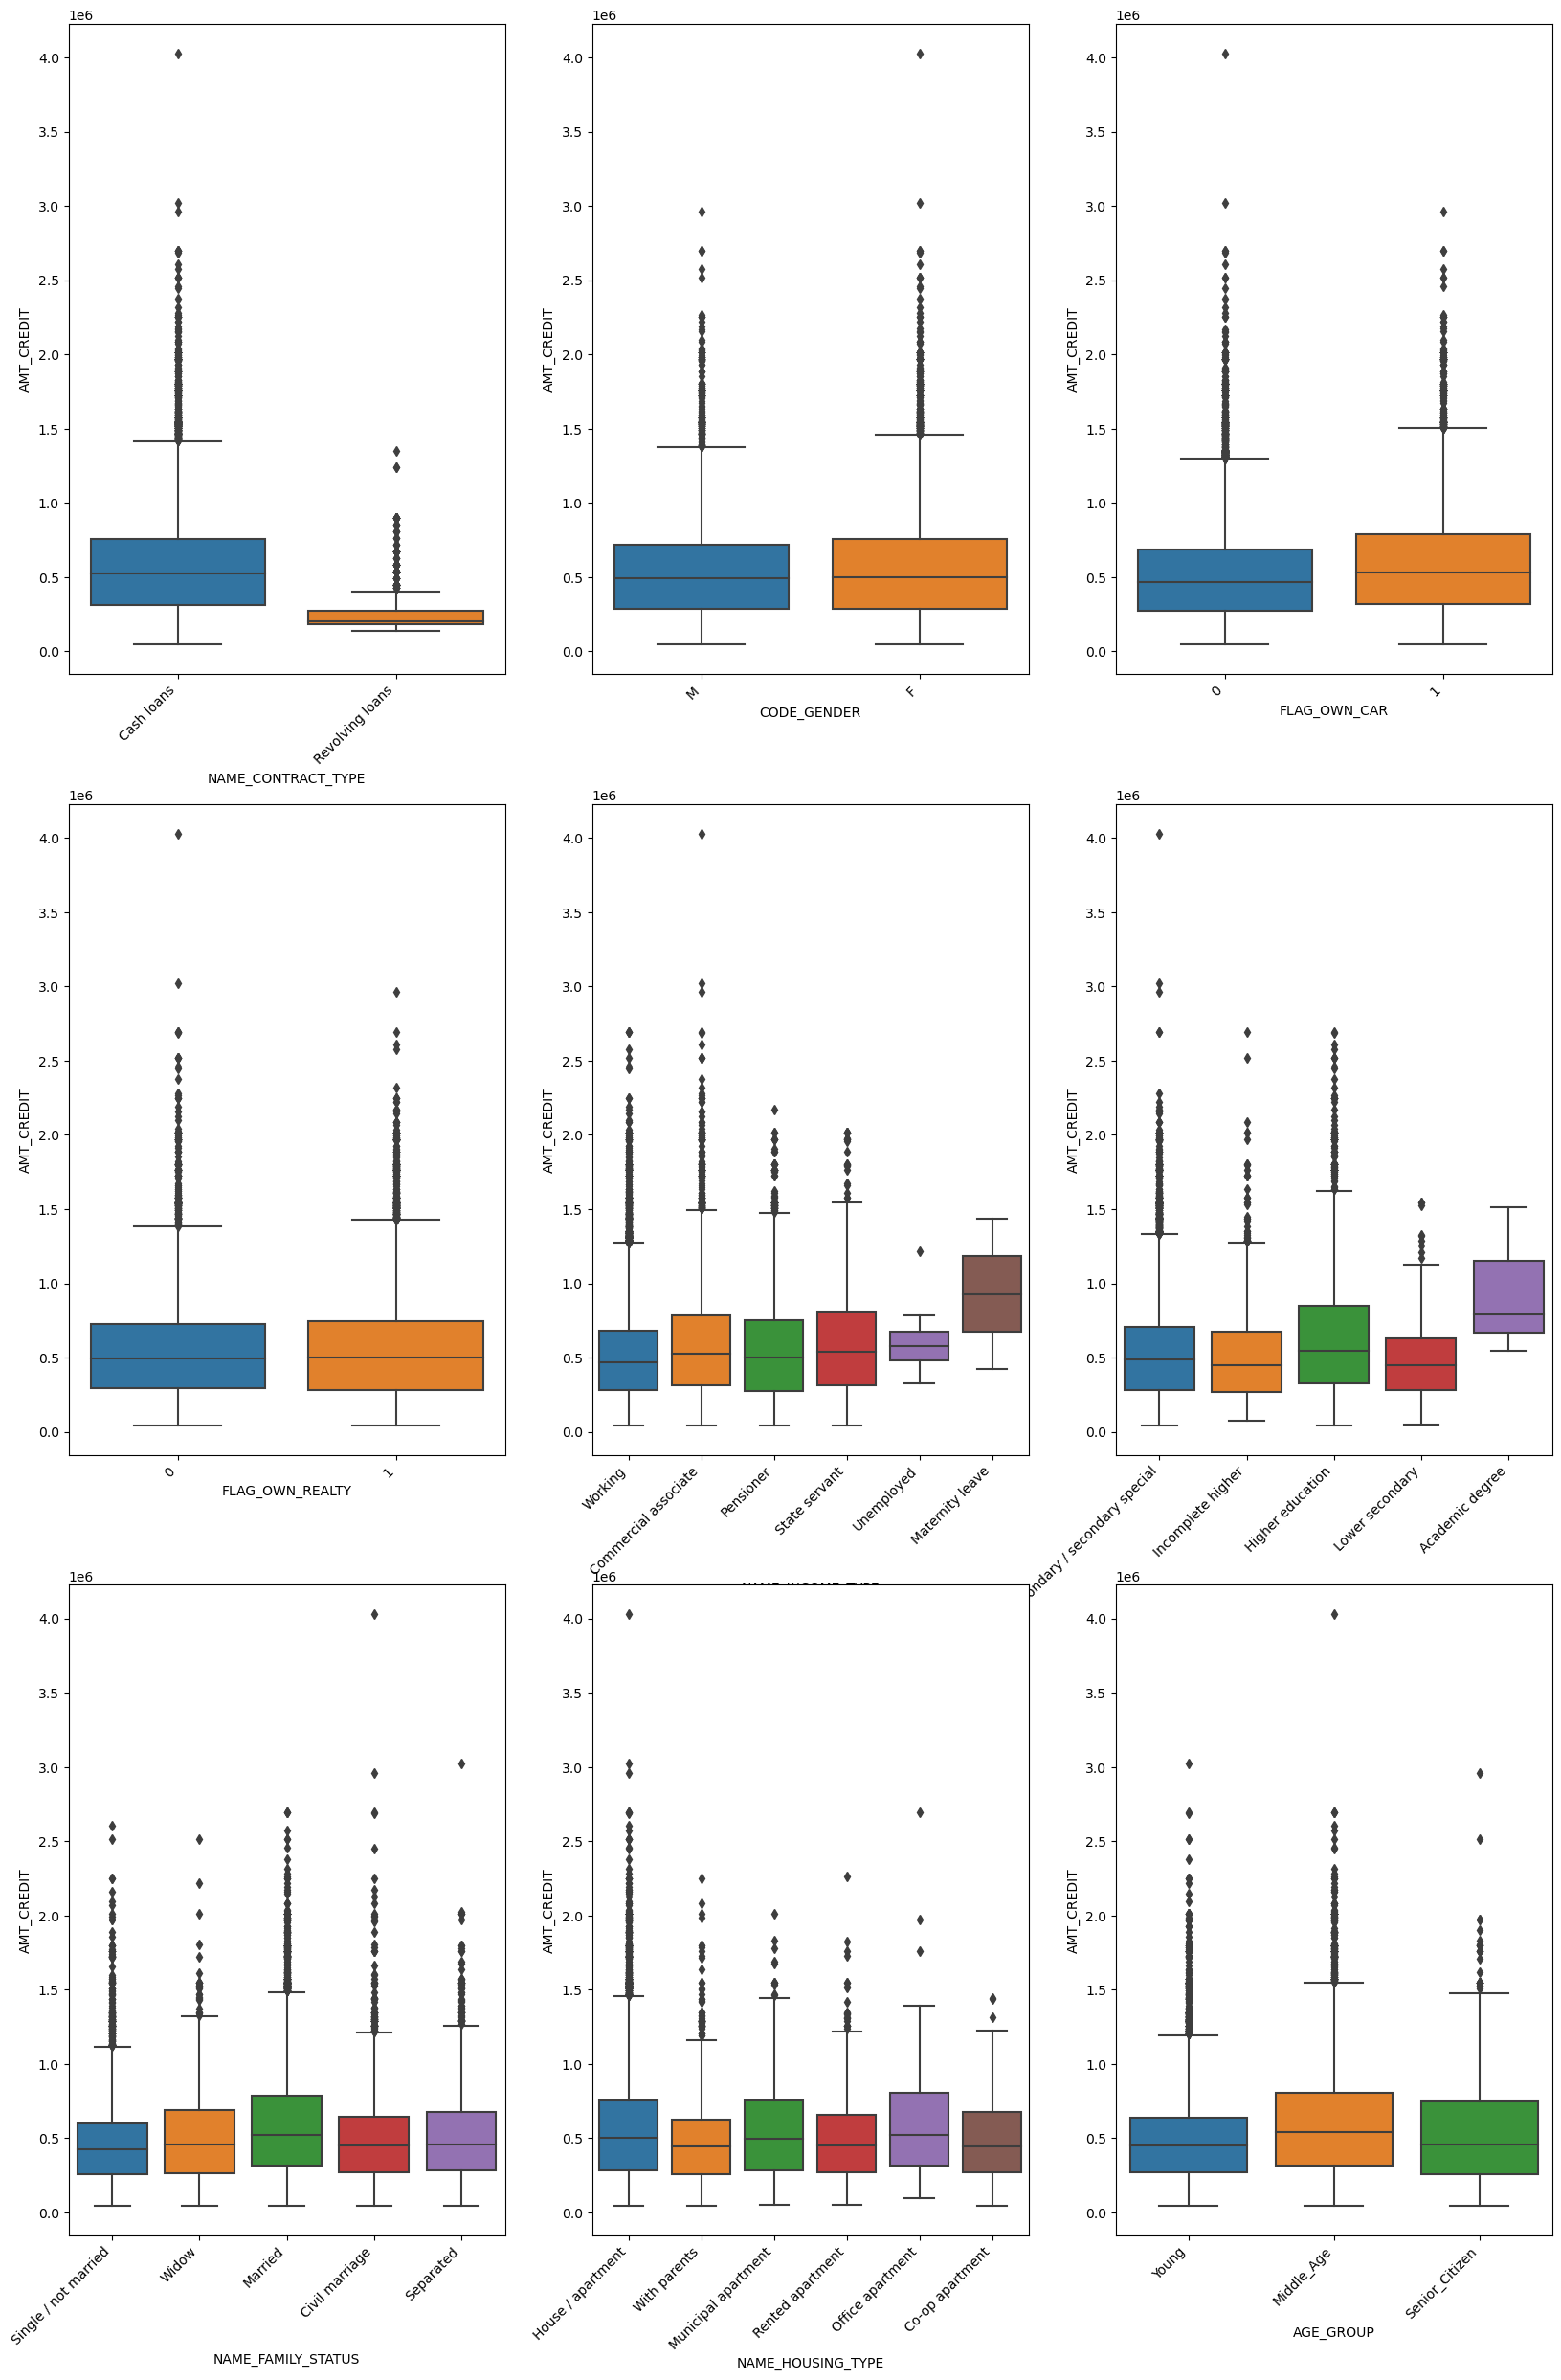

In [60]:
#Defaulters 

plt.figure(figsize=(20,30))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(3,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=Target1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


Insights:
1. Credit amount of the loans are very low for Revolving loans
2. There is no credit amount difference between genders, client owning cars or realty.
3. The Young age group got less amount of loan credited compared to mid age and senior citizen.
4. Higher income group have more loan amount credited.
5. Clients having higher external score have more loan amount.


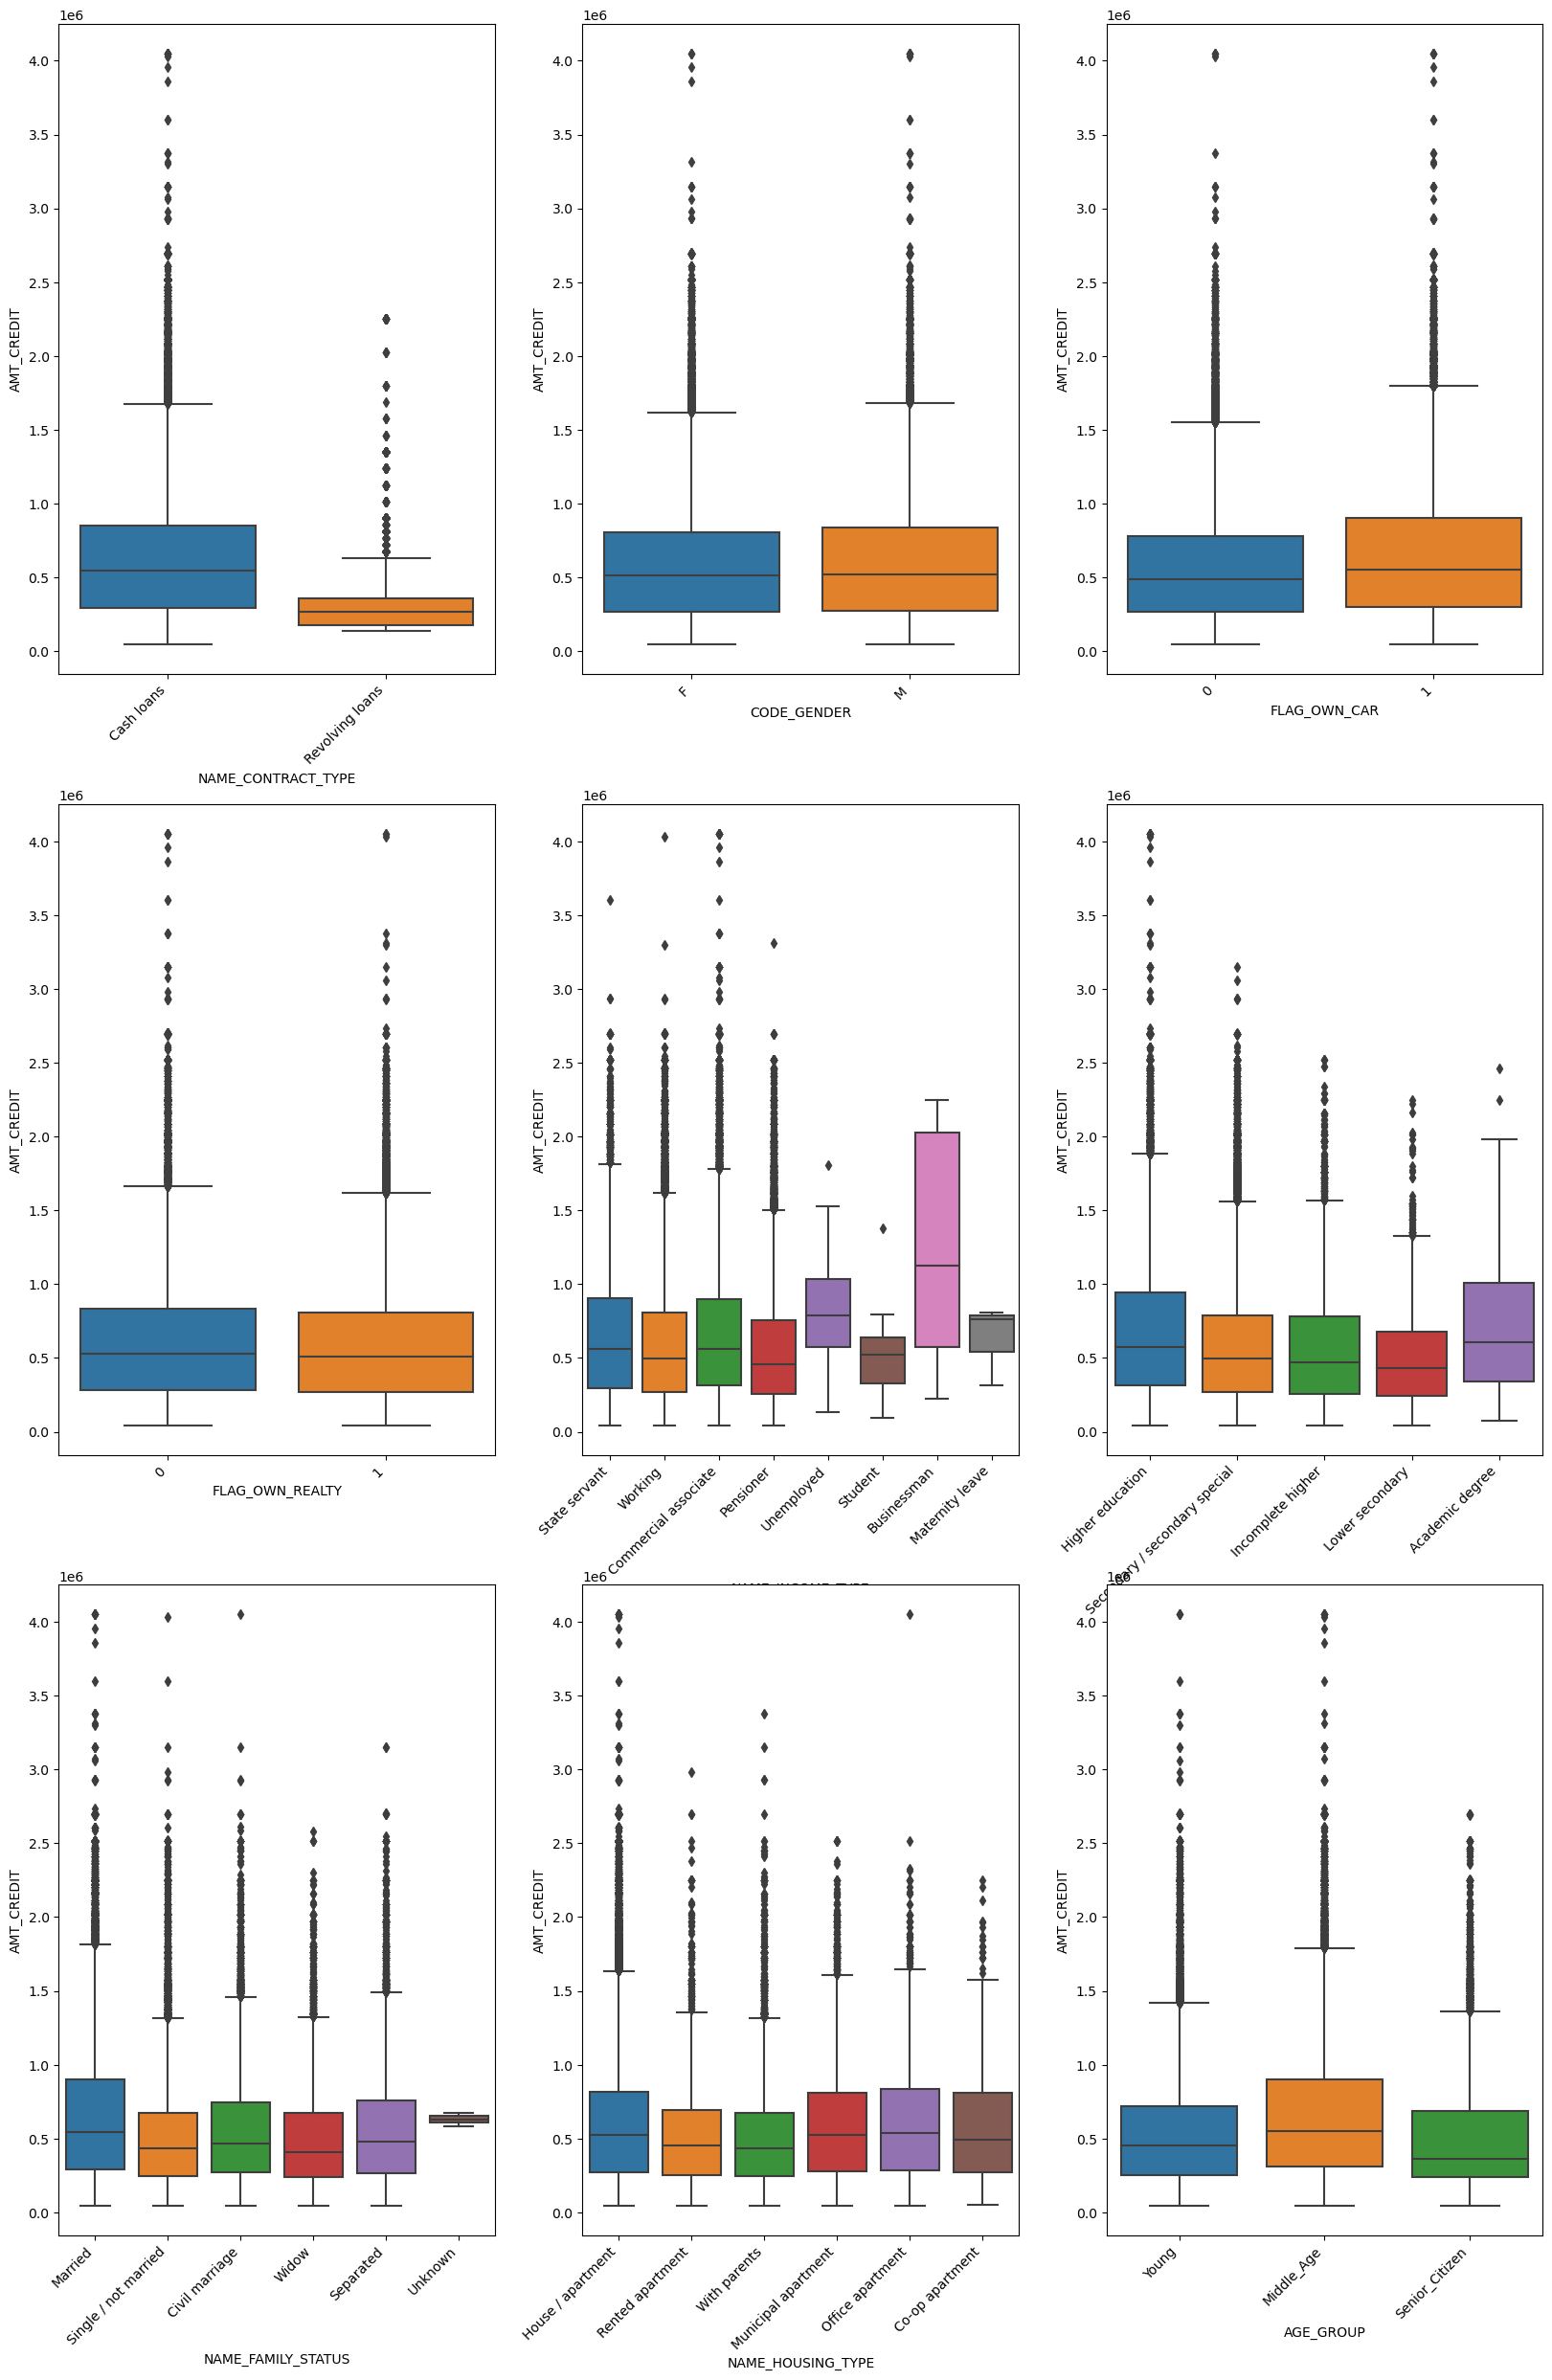

In [61]:
plt.figure(figsize=(20,30))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(3,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=Target0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')



Insights :
 1. Credit amount of the loans are very low for Revolving loans
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The mid age group got more amount of loan credited cmpared to young and senior citizen.
4. Higher income group have more loan amount credited and lower the lowest.
5. Clients having higher external score have more loan amount.
6. Surprisingly the unemployed people have spike in credit amount of loan
7. The Married people have more loan amount credited.   

# 11. Correlation Analysis 

## Correlations between numerical variables Using "Pair Plots "

#### 11.1. Analysing Numerical Columns

In [62]:
numerical_col = df_app.select_dtypes(include='number').columns
numerical_col


Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### 11.2. Pair Plot for Target 1  

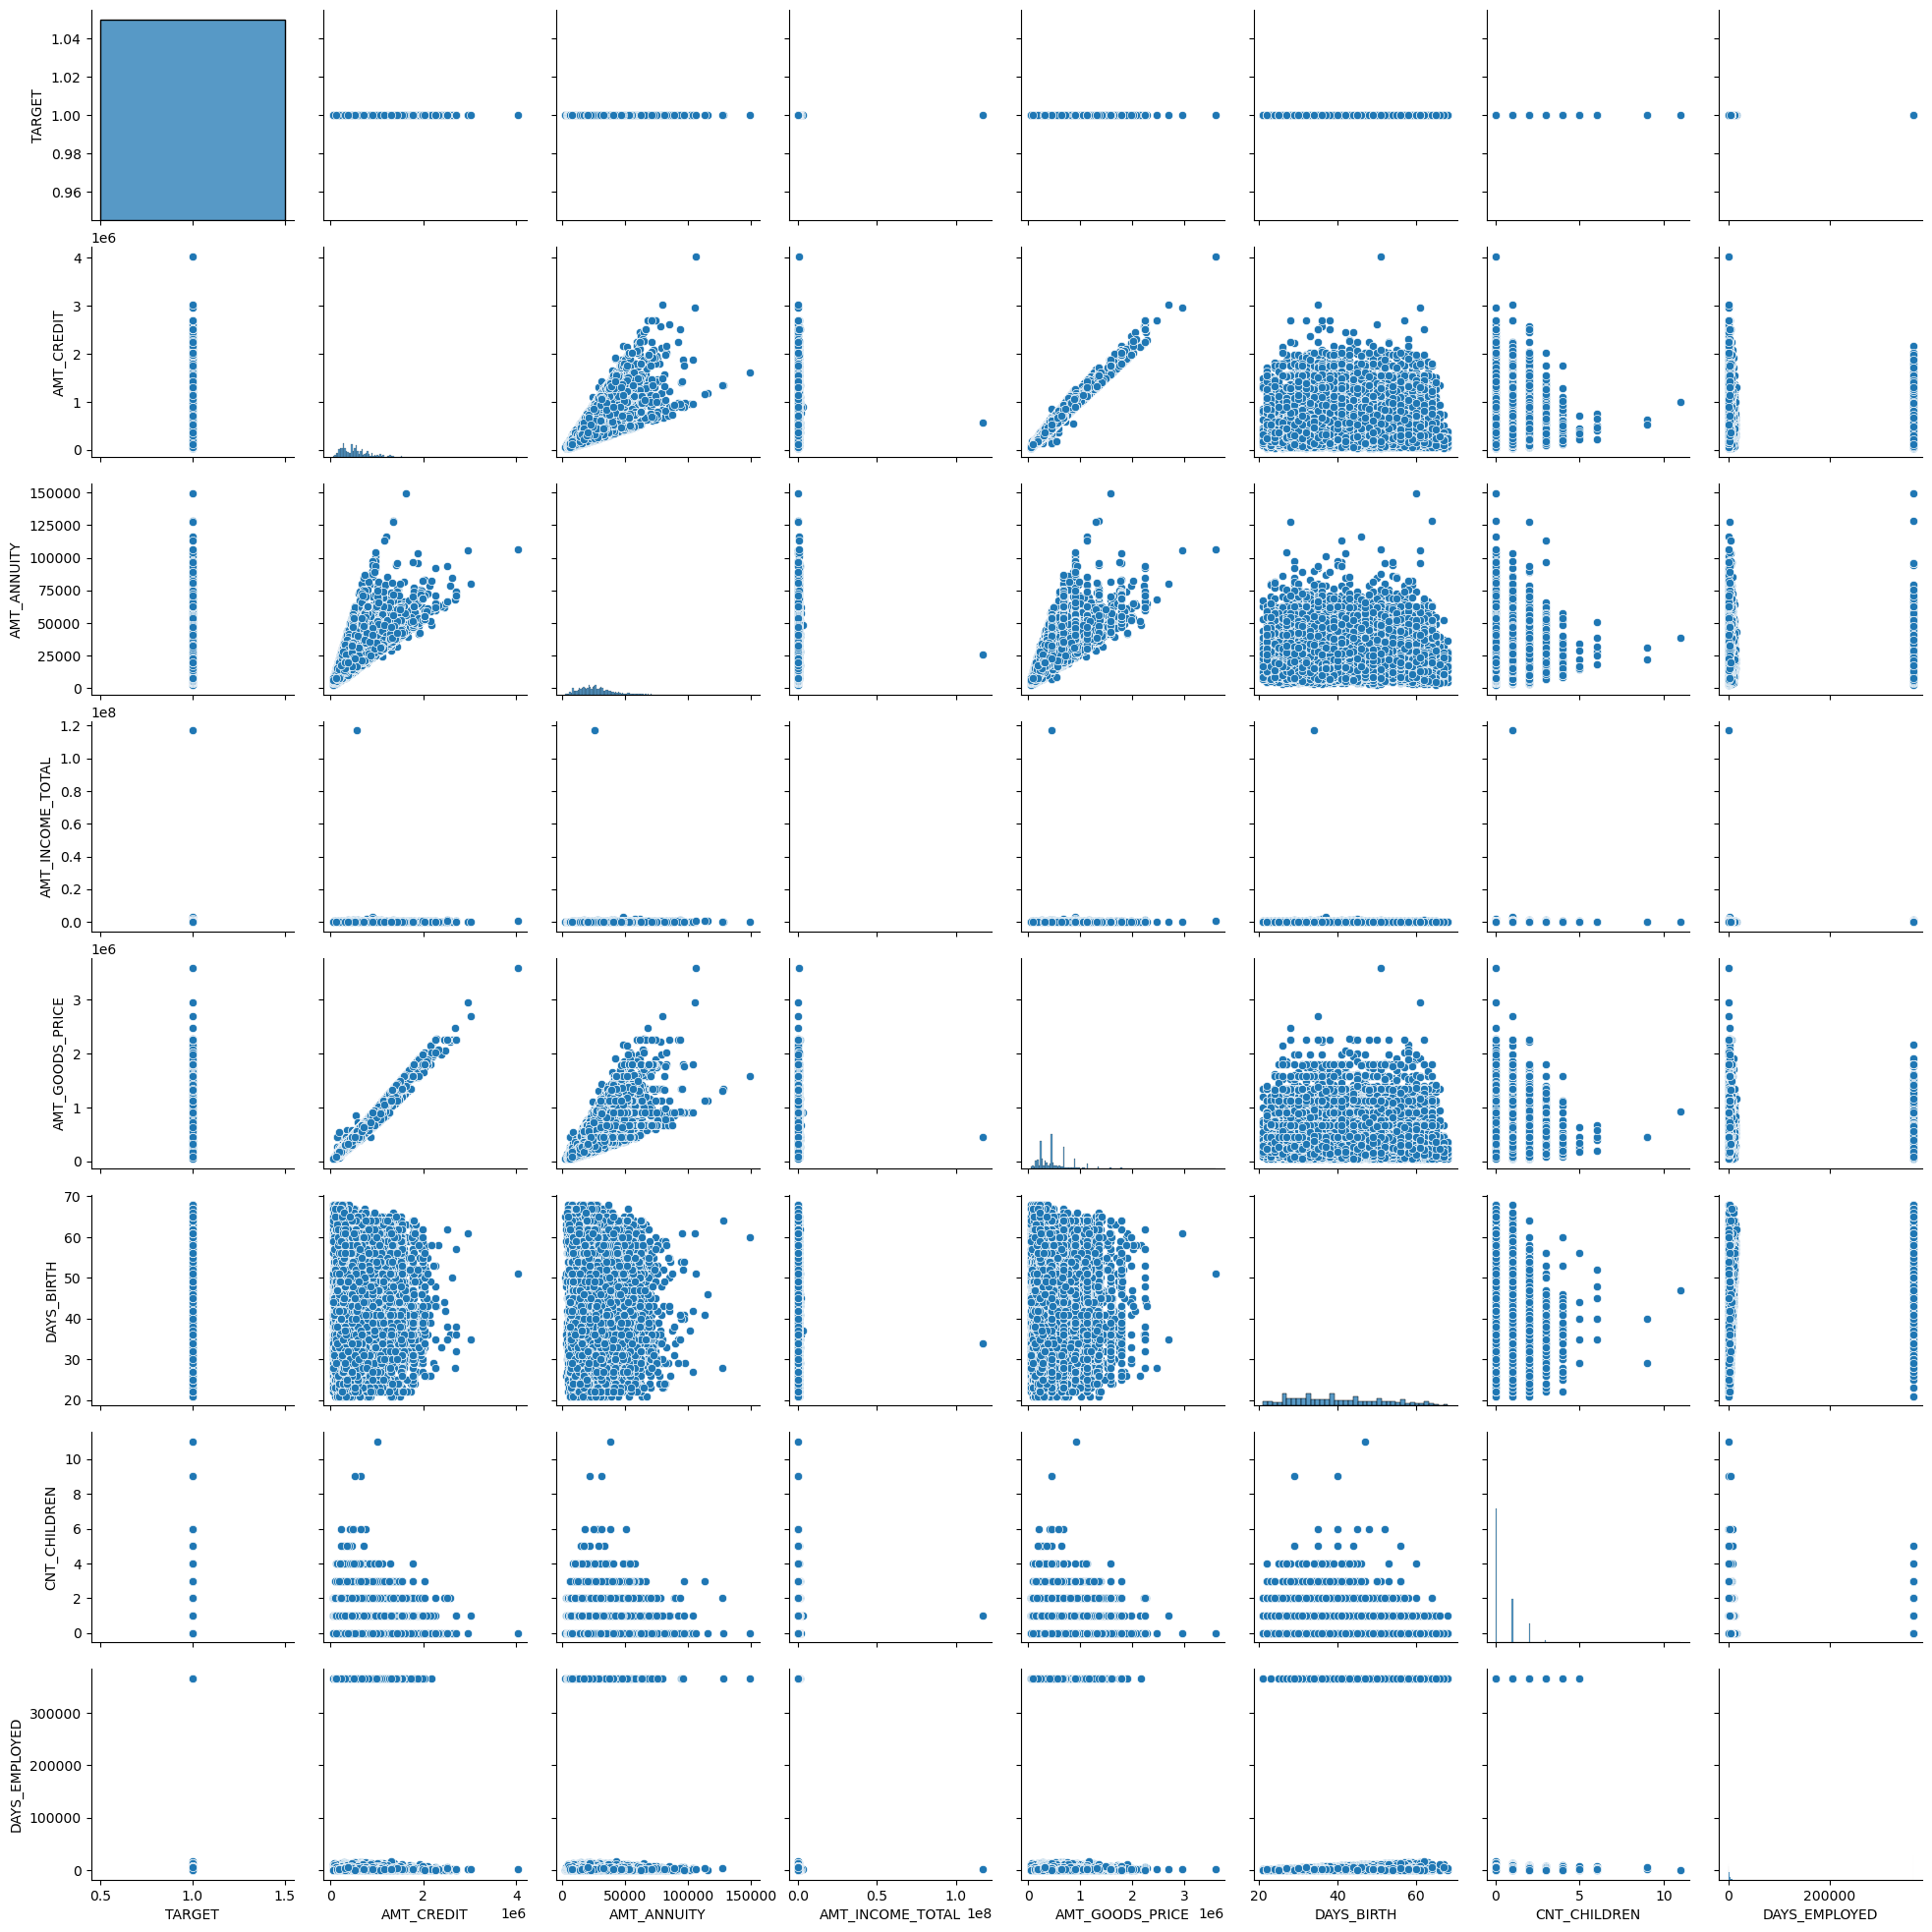

In [63]:
#Defaulters 
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()


#### 11.3. Pair Plot for Target 0 

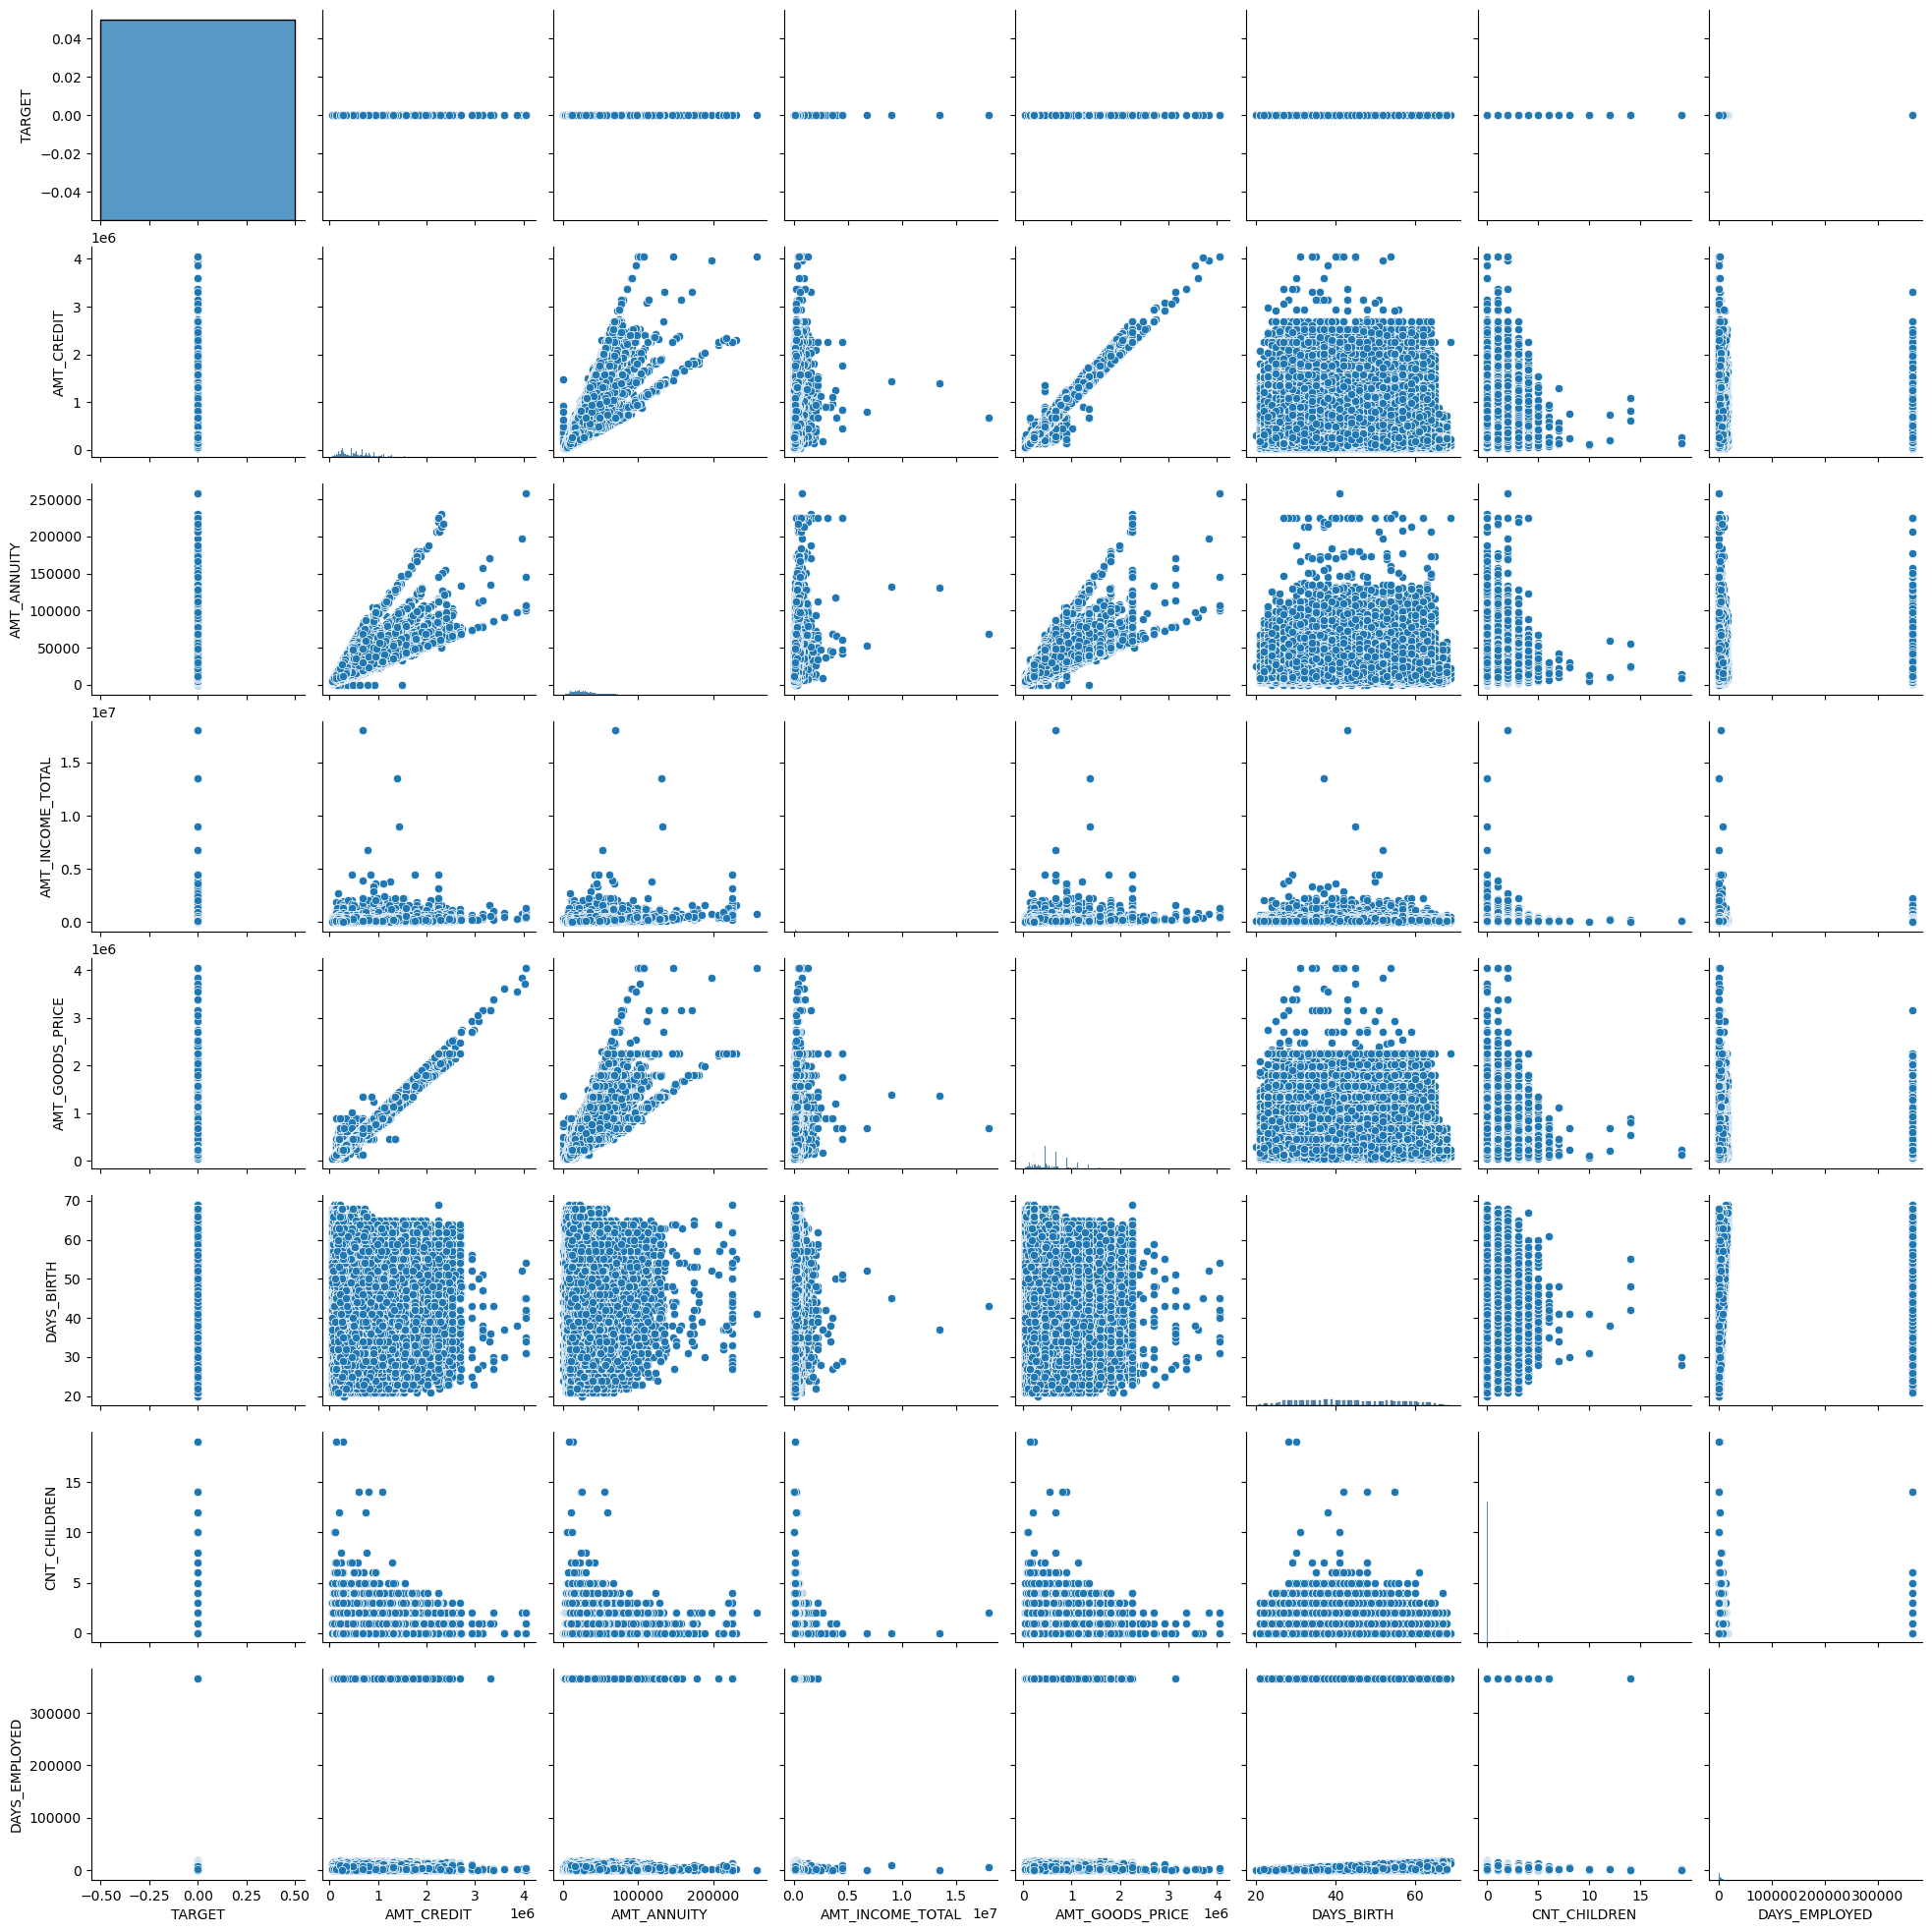

In [64]:
#Repayers 
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

Insights :
1. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non - defaulters. So as the home price increases the loan amount also increases

2. AMT_CREDIT and AMT_ANNUITY (EMI) are highly correlated variables for both defaulters and non - defaulters . So as the home price increases the EMI amount also increases which is logical

3. All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

##  Correlations between numerical variables using "Heatmap's"

#### 11.4. Seperating Data into two 

In [65]:
#Seperating Data into two variables 

corr0=df_app.iloc[0:,2:]
corr1=df_app.iloc[0:,2:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1



#### 11.5. Plotting the Correlations  

In [66]:
def targets_corr(data,title):
    plt.figure(figsize=(10, 5))
    
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='YlGnBu') 

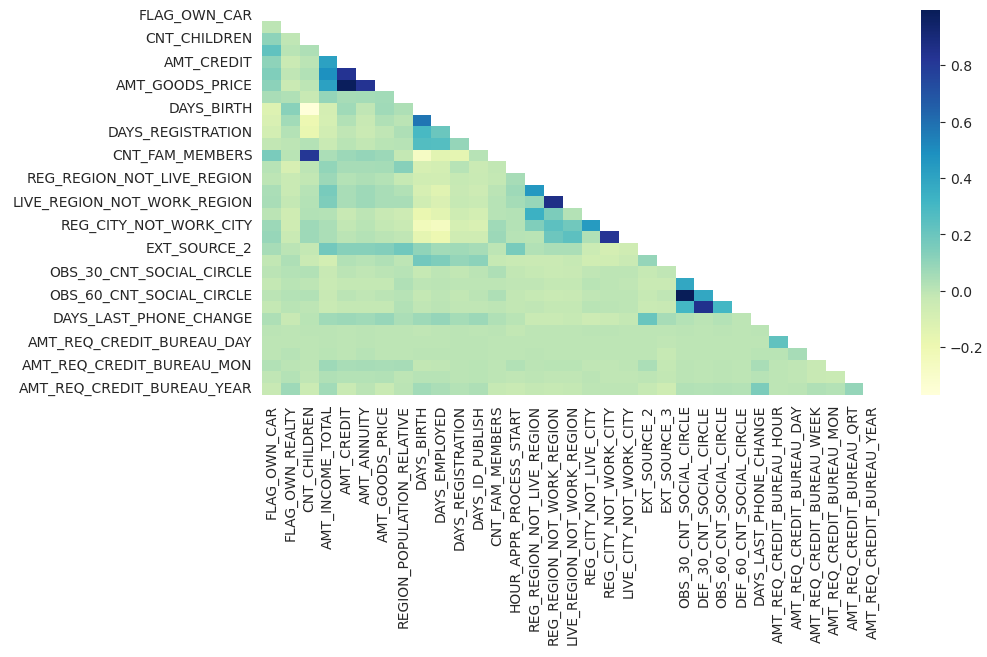

In [67]:
targets_corr(data=t0,title='Correlation for Target 0')


Insights :
1. AMT_CREDIT is inversely proportional to the DAYS_BIRTH , peoples belongs to low-age group taking high Credit amount and vice-versa

2. AMT_CREDIT is inversely proportional to the CNT_CHILDREN, means Credit amount is higher for less children count client have and vice-versa.

3. AMT_INCOME_TOTAL is inversely proportional to the CNT_CHILDREN, means more income for less children client have and vice-versa.

4. less children client have in densely populated area.

5. AMT_CREDIT is higher to densely populated area.

6. AMT_INCOME_TOTAL is also higher in densely populated area.

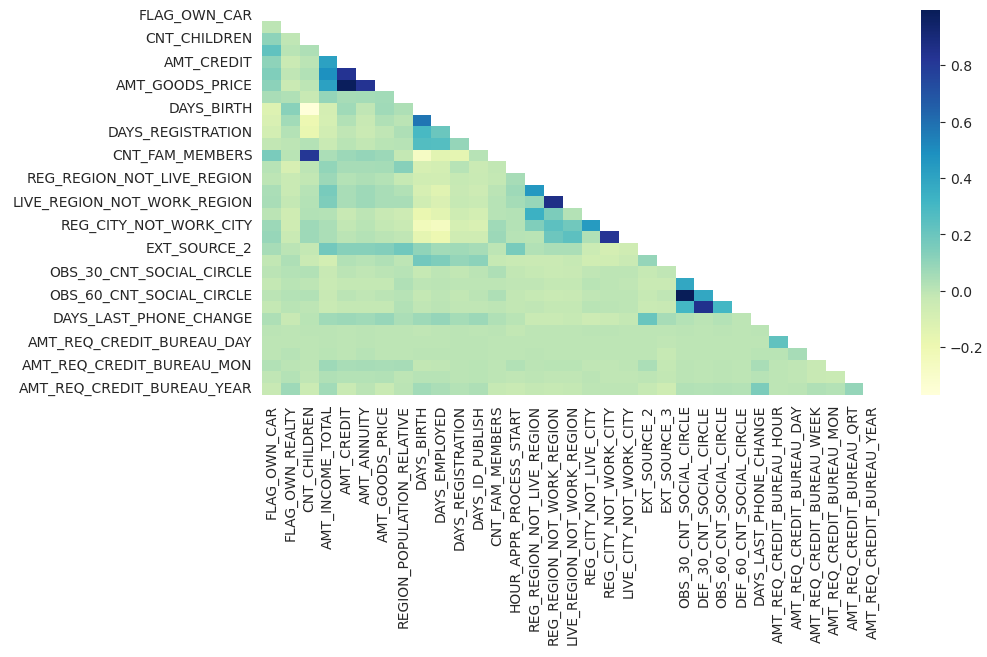

In [68]:
targets_corr(data=t1,title='Correlation for Target 1')



Insights :
1. This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

2. The client's permanent address does not match contact address are having less children.

3. The client's permanent address does not match work address are having less children.

# 12. Top 10 Correlations  

#### 12.1. Target 0

In [69]:
Columns=Target0.columns  #Collecting all Columns of Target0 

corr=Target0[Columns].corr(method = 'pearson')                        # Finding correlations using corr() func.

corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0=corr.unstack().reset_index() # Top 10 Correlations           
top10_corr0.columns = ['VAR1','VAR2','CORRELATION']  # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)

top10_corr0['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)


VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998510   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.987022   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859371   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776433   
251                  AMT_ANNUITY                  AMT_CREDIT     0.771309   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.626028   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101   

     CORR_ABS  
934  0.998510  
286  0.987022  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776433  
251  0.771309  
395  0.626028  
611  0.446101

#### 12.2 Target 1 

In [70]:
Columns=Target1.columns   #Collecting all Columns of Target1 

corr1=Target1[Columns].corr(method = 'pearson')
corr1=corr1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))             # Finding correlations using corr() func


top10_corr1=corr1.unstack().reset_index()   # Top 10 Correlations     
top10_corr1.columns = ['VAR1','VAR2','CORRELATION']     # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr1.dropna(subset=['CORRELATION'],inplace=True)

top10_corr1['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr1.sort_values('CORR_ABS', ascending=False).head(10)



VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998270   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.982783   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.869016   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752295   
251                  AMT_ANNUITY                  AMT_CREDIT     0.752195   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.582441   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937   

     CORR_ABS  
934  0.998510  
286  0.987022  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776433  
251  0.771309  
395  0.626028  
611  0.446101

Insights :
Correlations are observed to be at the same level. 

# 13. Loading dataset "previous_application.csv"

#### 13.1. Reading the dataset  

In [71]:
df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

#### 13.2. Reading the dataframe  

In [72]:
df_prev.shape

(1670214, 37)

#### 13.3. Checking datatypes 

In [73]:
df_prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### 13.4. Summarizing the Numeric columns  

In [74]:
df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## 14. Handling Missing Values

In [94]:
#handeling missing values 
df_prev.replace('XNA',np.nan,inplace=True)
df_prev.replace('XAP',np.nan,inplace=True)

In [95]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_prev.columns[(round(100*(df_prev.isnull().sum()/len(df_prev.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

[]

In [96]:
# Delete the columns having more than 30% missing values
df_prev= df_prev.drop(cols_30_percent_missing_values,axis=1)

In [97]:
#List and delete the columns, which are not much relevant for the analysis
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [100]:
df_prev.shape

(1297979, 15)

In [101]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_prev[df_prev.isnull().sum(axis=1) > (len(df_prev.columns)//2)].index)


0

In [102]:
# Percent of missing values in columns
(round(100*(df_prev.isnull().sum()/len(df_prev.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [103]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(df_prev[np.isnan(df_prev['AMT_ANNUITY']) & np.isnan(df_prev['CNT_PAYMENT']) & np.isnan(df_prev['AMT_GOODS_PRICE'])])


0

In [104]:
#As there are only 333855 such records we can delete those. Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis. It is better to delete such rows instead of imputing values and making the analysis biased.
df_prev = df_prev[(~(np.isnan(df_prev['AMT_ANNUITY']) & np.isnan(df_prev['AMT_GOODS_PRICE']) & np.isnan(df_prev['CNT_PAYMENT'])))]
df_prev.shape

(1297979, 15)

In [105]:
(round(100*(df_prev.isnull().sum()/len(df_prev.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [106]:
# Count the rows for which AMT_ANNUITY is empty
len(df_prev[np.isnan(df_prev['AMT_ANNUITY'])])

0

In [107]:
# As there are only 38380 rows we can delte those records
df_prev = df_prev[~(np.isnan(df_prev['AMT_ANNUITY']))]

In [108]:
df_prev.shape

(1297979, 15)

In [109]:
(round(100*(df_prev.isnull().sum()/len(df_prev.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [110]:
df_prev.shape

(1297979, 15)

## 15. Outliers Analysis 

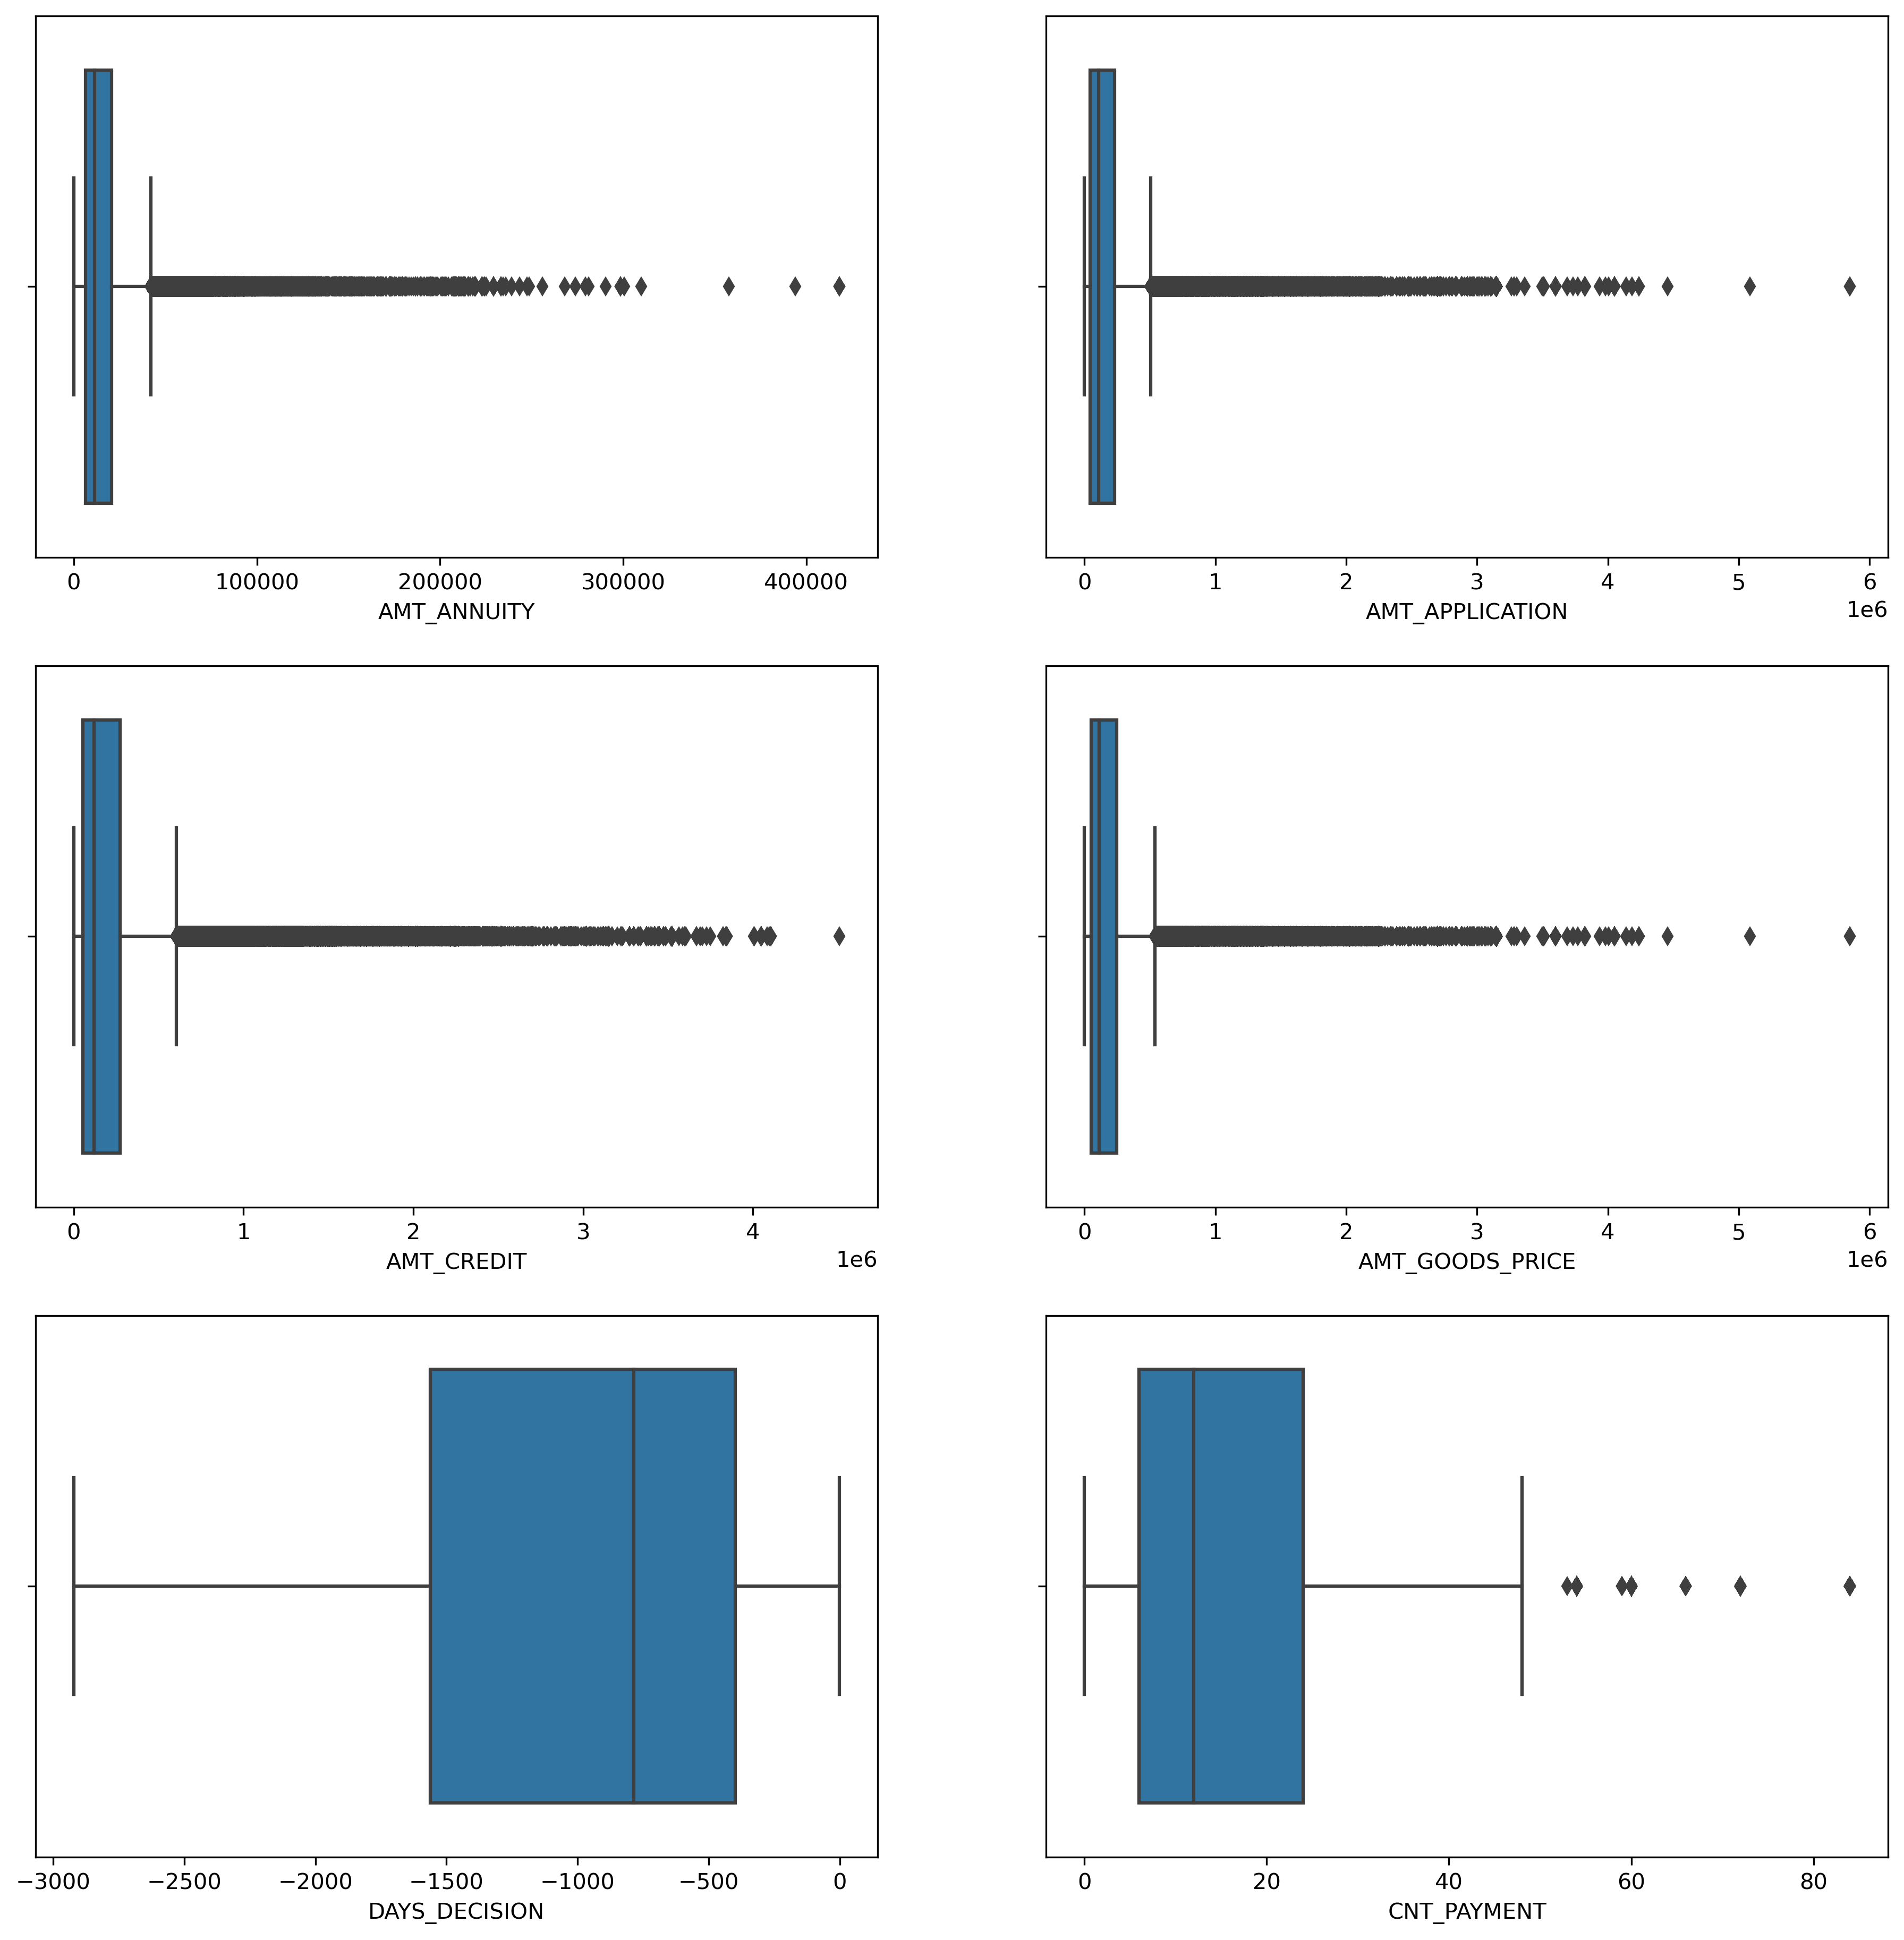

In [111]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']


plt.figure(figsize = (15, 15), dpi=300)
for i in enumerate(col_list):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x =i[1], data = df_prev)
plt.show()


## 16. Data Imbalance  

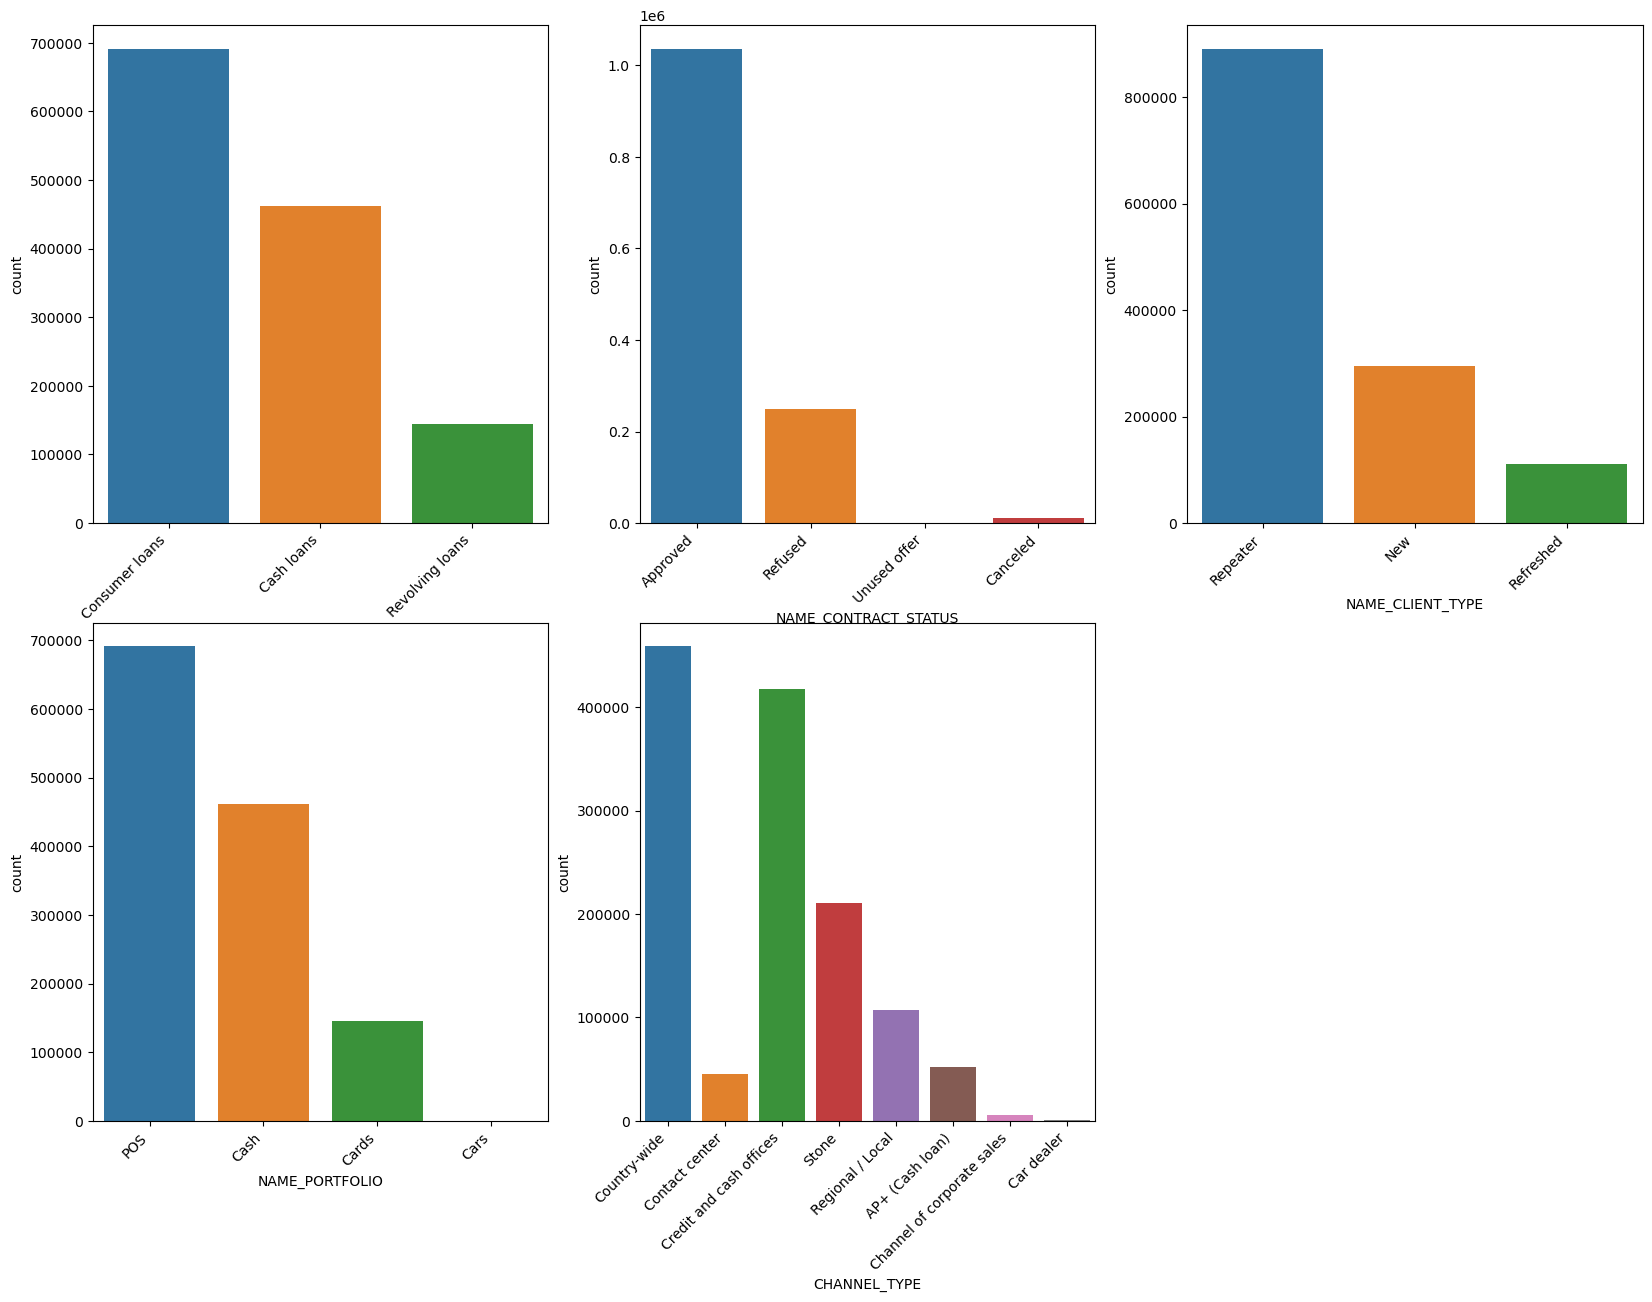

In [113]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = df_prev )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')